In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##At First

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [192]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/house-prices-advanced-regression-techniques/test.csv")

In [193]:
#欠損値処理のために一旦統合
#TrainFlagという列を新たに作り、訓練データにはTrue、テストデータにはFalseとしておく。
train["TrainFlag"] = True
test["TrainFlag"] = False

#訓練データとテストデータを結合する
alldata = train.append(test)



In [194]:
# for i in train.columns:
#   print(i)
#   plt.scatter(train[i].values,train["SalePrice"].values)
#   plt.show()

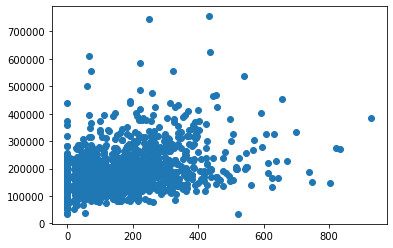

In [195]:
plt.scatter(train["WoodDeckSF"].values+train["OpenPorchSF"].values,train["SalePrice"].values)

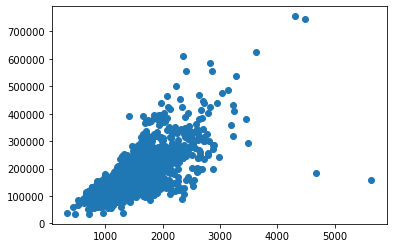

In [196]:
plt.scatter(train["1stFlrSF"].values+train["2ndFlrSF"].values,train["SalePrice"].values)

In [197]:
#欠損値がある変数だけが降順に並び替え
alldata.isnull().sum()[alldata.isnull().sum()>0].sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFinSF1         1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64

In [198]:
# nu=["LotFrontage",
#     "GarageYrBlt",
#     "MasVnrArea",
#     "BsmtFullBath",
#     "BsmtHalfBath",
#     "BsmtFinSF2",
#     "BsmtFinSF1",
#     "BsmtUnfSF",
#     "TotalBsmtSF",
#     "GarageCars",
#     "GarageArea"
#     ]
# ob=["GarageFinish","GarageQual","GarageCond","GarageType",
#     "BsmtExposure","BsmtCond","BsmtQual","BsmtFinType2","BsmtFinType1",
#     "MasVnrType","Electrical",
#     "MSZoning","Functional","Utilities","SaleType","KitchenQual",
#     "Exterior1st","Exterior2nd"
#     ]
# for i in nu:
#   alldata[i] = alldata[i].fillna(alldata[i].median())
# for i in ob:
#   alldata[i]=alldata[i].fillna(alldata[i].mode().iloc[0])

#物件に隣接した道路の長さ（LotFrontage）の欠損値を平均値で穴埋め
alldata['LotFrontage'] = alldata['LotFrontage'].fillna(alldata['LotFrontage'].median())

# 変数の型ごとに欠損値の扱いが異なるため、変数ごとに処理
for column in alldata.columns:
    # dtypeがobjectの場合、文字列の変数
    if alldata[column].dtype=='O':
        alldata[column] = alldata[column].fillna(alldata[column].mode().iloc[0])
    # dtypeがint , floatの場合、数字の変数
    else:
        alldata[column] = alldata[column].fillna(alldata[column].median())
alldata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TrainFlag
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500.0,True
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500.0,True
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500.0,True
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0,True
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Gd,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal,163000.0,False
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,Gd,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml,163000.0,False
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml,163000.0,False
14

In [199]:
#目的変数を先頭コラムに
cols=alldata.columns.tolist()
cols=cols[-2:]+cols[:-2]
# cols=list(cols[0])+list(cols[-1])+cols[1:-1]
# cols=cols[1:]+cols[:-1]

alldata =  alldata[cols] 
alldata

,SalePrice,TrainFlag,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500.0,True,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,...,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal
1,181500.0,True,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,...,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal
2,223500.0,True,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,...,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal
3,140000.0,True,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,...,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml
4,250000.0,True,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,...,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,163000.0,False,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,...,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Gd,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,163000.0,False,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,...,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,Gd,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,163000.0,False,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,...,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,163000.0,False,2918,85,RL,62.0,10441,Pave,Grvl,

In [200]:
# alldata = alldata.drop(['Id'], axis = 1)
alldata = alldata.drop(["Id","Utilities","Condition2","BsmtFinSF2",
                        "LowQualFinSF","BsmtFullBath","BsmtHalfBath",
                        "3SsnPorch","ScreenPorch","MiscFeature","MiscVal",
                        "YrSold","MoSold"], axis = 1)

alldata["YearBuilt+YearRemodAdd"]=alldata["YearBuilt"].values+alldata["YearRemodAdd"].values
alldata["1stFlrSF+2ndFlrSF"]=alldata["1stFlrSF"].values+alldata["2ndFlrSF"].values

alldata = alldata.drop(["YearBuilt","YearRemodAdd","1stFlrSF","2ndFlrSF"], axis = 1)

In [201]:
alldata.head()

,SalePrice,TrainFlag,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,SaleType,SaleCondition,YearBuilt+YearRemodAdd,1stFlrSF+2ndFlrSF
0,208500.0,True,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,1710,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,Ex,MnPrv,WD,Normal,4006,1710
1,181500.0,True,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,Ex,MnPrv,WD,Normal,3952,1262
2,223500.0,True,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,1786,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,Ex,MnPrv,WD,Normal,4003,1786
3,140000.0,True,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,1717,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,Ex,MnPrv,WD,Abnorml,3885,1717
4,250000.0,True,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,2198,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,Ex,MnPrv,WD,Normal,4000,2198


In [202]:

# #目的変数を先頭コラムに
# cols=alldata.columns.tolist()
# cols=cols[-2:]+cols[:-2]
# # cols=list(cols[0])+list(cols[-1])+cols[1:-1]
# # cols=cols[1:]+cols[:-1]

# alldata =  alldata[cols] 
# alldata

###説明変数を対数変換

In [203]:
# #数値の説明変数のリスト
# num_feats = alldata.dtypes[alldata.dtypes != "object"].index
# num_feats =num_feats[1:]
# #各説明変数の歪度を計算
# skewed_feats = alldata[num_feats].apply(lambda x: x.skew()).sort_values(ascending = False)

# #歪度の絶対値が0.5より大きい変数だけに絞る
# skewed_feats_over = skewed_feats[abs(skewed_feats) > 0.5].index

# #Yeo-Johnson変換
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()
# pt.fit(alldata[skewed_feats_over])

# #変換後のデータで各列を置換
# alldata[skewed_feats_over] = pt.transform(alldata[skewed_feats_over])

# alldata

In [204]:
# #特徴量の追加
# #プールの有無（広さが0より大きい場合は有）
# alldata['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# #２階の有無（広さが0より大きい場合は有）
# alldata['has2ndfloor'] = alldata['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# #ガレージの有無（広さが0より大きい場合は有）
# alldata['hasgarage'] = alldata['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# #地下室の有無（広さが0より大きい場合は有）
# alldata['hasbsmt'] = alldata['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# #暖炉の有無
# alldata['hasfireplace'] = alldata['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [205]:
# train=pd.get_dummies(train, drop_first=True)
# test=pd.get_dummies(test, drop_first=True)


########カテゴリカル変数
alldata=pd.get_dummies(alldata,drop_first=True)
alldata

,SalePrice,TrainFlag,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,YearBuilt+YearRemodAdd,1stFlrSF+2ndFlrSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,True,60,65.0,8450,7,5,196.0,706.0,150.0,856.0,1710,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,4006,1710,0,0,1,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,181500.0,True,20,80.0,9600,6,8,0.0,978.0,284.0,1262.0,1262,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,3952,1262,0,0,1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,223500.0,True,60,68.0,11250,7,5,162.0,486.0,434.0,920.0,1786,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,4003,1786,0,0,1,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,140000.0,True,70,60.0,9550,7,5,0.0,216.0,540.0,756.0,1717,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,3885,1717,0,0,1,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,250000.0,True,60,84.0,14260,8,5,350.0,655.0,490.0,1145.0,2198,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,4000,2198,0,0,1,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,163000.0,False,160,21.0,1936,4,7,0.0,0.0,546.0,546.0,1092,1,1,3,1,5,0,1979.0,0.0,0.0,0,0,0,0,3940,1092,0,0,0,1,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1455,163000.0,False,160,21.0,1894,4,5,0.0,252.0,294.0,546.0,1092,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,3940,1092,0,0,0,1,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,163000.0,False,20,160.0,20000,5,7,0.0,1224.0,0.0,1224.0,1224,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,3956,1224,0,0,1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1457,163000.0,False,85,62.0,10441,5,5,0.0,337.0,575.0,912.0,970,1,0,3,1,6,0,1979.0,0.0,0.0,80,32,0,0,3984,970,0,0,1,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [206]:
#欠損値がある変数だけが降順に並び替え
alldata.isnull().sum()[alldata.isnull().sum()>0].sort_values(ascending = False)
alldata

,SalePrice,TrainFlag,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,YearBuilt+YearRemodAdd,1stFlrSF+2ndFlrSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,True,60,65.0,8450,7,5,196.0,706.0,150.0,856.0,1710,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,4006,1710,0,0,1,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,181500.0,True,20,80.0,9600,6,8,0.0,978.0,284.0,1262.0,1262,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,3952,1262,0,0,1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,223500.0,True,60,68.0,11250,7,5,162.0,486.0,434.0,920.0,1786,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,4003,1786,0,0,1,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,140000.0,True,70,60.0,9550,7,5,0.0,216.0,540.0,756.0,1717,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,3885,1717,0,0,1,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,250000.0,True,60,84.0,14260,8,5,350.0,655.0,490.0,1145.0,2198,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,4000,2198,0,0,1,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,163000.0,False,160,21.0,1936,4,7,0.0,0.0,546.0,546.0,1092,1,1,3,1,5,0,1979.0,0.0,0.0,0,0,0,0,3940,1092,0,0,0,1,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1455,163000.0,False,160,21.0,1894,4,5,0.0,252.0,294.0,546.0,1092,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,3940,1092,0,0,0,1,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,163000.0,False,20,160.0,20000,5,7,0.0,1224.0,0.0,1224.0,1224,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,3956,1224,0,0,1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1457,163000.0,False,85,62.0,10441,5,5,0.0,337.0,575.0,912.0,970,1,0,3,1,6,0,1979.0,0.0,0.0,80,32,0,0,3984,970,0,0,1,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [207]:
train=alldata.loc[alldata.TrainFlag]
train=train.drop("TrainFlag",axis=1)

In [208]:
train.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,YearBuilt+YearRemodAdd,1stFlrSF+2ndFlrSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,...,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,60,65.0,8450,7,5,196.0,706.0,150.0,856.0,1710,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,4006,1710,0,0,1,0,1,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,181500.0,20,80.0,9600,6,8,0.0,978.0,284.0,1262.0,1262,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,3952,1262,0,0,1,0,1,0,0,0,1,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,223500.0,60,68.0,11250,7,5,162.0,486.0,434.0,920.0,1786,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,4003,1786,0,0,1,0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,140000.0,70,60.0,9550,7,5,0.0,216.0,540.0,756.0,1717,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,3885,1717,0,0,1,0,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,250000.0,60,84.0,14260,8,5,350.0,655.0,490.0,1145.0,2198,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,4000,2198,0,0,1,0,1,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 224 entries, SalePrice to SaleCondition_Partial
dtypes: float64(9), int64(17), uint8(198)
memory usage: 590.3 KB


In [210]:
train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [211]:
test=alldata.loc[~alldata.TrainFlag]
test=test.drop("TrainFlag",axis=1)
# test=test.drop("SalePrice",axis=1)

In [212]:
test.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,YearBuilt+YearRemodAdd,1stFlrSF+2ndFlrSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,...,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,163000.0,20,80.0,11622,5,6,0.0,468.0,270.0,882.0,896,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,3922,896,0,1,0,0,1,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,163000.0,20,81.0,14267,6,6,108.0,923.0,406.0,1329.0,1329,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,3916,1329,0,0,1,0,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,163000.0,60,74.0,13830,5,5,0.0,791.0,137.0,928.0,1629,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,3995,1629,0,0,1,0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,163000.0,60,78.0,9978,6,6,20.0,602.0,324.0,926.0,1604,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,3996,1604,0,0,1,0,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,163000.0,120,43.0,5005,8,5,0.0,263.0,1017.0,1280.0,1280,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,3984,1280,0,0,1,0,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [213]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 224 entries, SalePrice to SaleCondition_Partial
dtypes: float64(9), int64(17), uint8(198)
memory usage: 589.9 KB


#分析

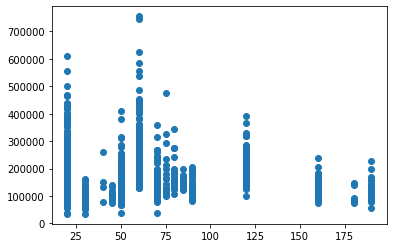

In [214]:
plt.scatter(train["MSSubClass"].values,train["SalePrice"].values)

In [215]:
# plt.scatter(train["YearRemodAdd"].values+train["YearBuilt"].values,train["SalePrice"].values)

In [216]:
for i in train.columns:
  print(i)
  plt.scatter(train[i].values,train["SalePrice"].values)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [217]:
train.columns[0]

'SalePrice'

In [218]:
import seaborn as sns
for i in train.columns:
  sns.distplot(train[i])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [219]:
# ##相関関係確認
# alldata_co = 
# alldata_co.head()

In [220]:
alldata.corr().style.background_gradient("summer_r")

Output hidden; open in https://colab.research.google.com to view.

###説明変数選択

In [221]:
# df_corr = train.corr()

# df_corr_price = df_corr[np.abs(df_corr) > 0.3].SalePrice

# list_corr_price = df_corr_price.tolist()

# removelist=[i for i, x in enumerate(list_corr_price) if np.isnan(x) == True]

# df_co_columns_values = train.columns.values

# list_co_columns=[]
# for i in removelist:
#   list_co_columns.append(df_co_columns_values[i]) #['MSSubClass',...

# df_co_train= train.drop(list_co_columns,axis=1)
# print(df_co_train)

# df_co_test= test.drop(list_co_columns,axis=1)
# print(df_co_test)

# train=df_co_train
# test=df_co_test

      SalePrice  LotFrontage  ...  SaleType_New  SaleCondition_Partial
0      208500.0         65.0  ...             0                      0
1      181500.0         80.0  ...             0                      0
2      223500.0         68.0  ...             0                      0
3      140000.0         60.0  ...             0                      0
4      250000.0         84.0  ...             0                      0
...         ...          ...  ...           ...                    ...
1455   175000.0         62.0  ...             0                      0
1456   210000.0         85.0  ...             0                      0
1457   266500.0         66.0  ...             0                      0
1458   142125.0         68.0  ...             0                      0
1459   147500.0         75.0  ...             0                      0

[1460 rows x 38 columns]
      SalePrice  LotFrontage  ...  SaleType_New  SaleCondition_Partial
0      163000.0         80.0  ...             0    

##Before

In [385]:
# train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [386]:
# train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1]:
# test.info()

In [387]:
# cols=train.columns.tolist()#cols=cols[-1:]+cols[:-1]

In [388]:
# cols=cols[-1:]+cols[:-1]

In [389]:
# train = train[cols] 

In [390]:
# train.describe()

,SalePrice,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,79442.502883,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,34900.000000,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,129975.000000,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,163000.000000,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,214000.000000,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,755000.000000,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [391]:
import seaborn as sns

In [392]:
# sns.pairplot(train)
# plt.show()

In [393]:
# train.corr().style.background_gradient("summer_r") #OverallQual

,SalePrice,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
SalePrice,1.000000,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.486362,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923
Id,-0.021917,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,-0.084284,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,0.351799,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,0.263843,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.790982,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.077856,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.522897,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.507101,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.477493,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.0

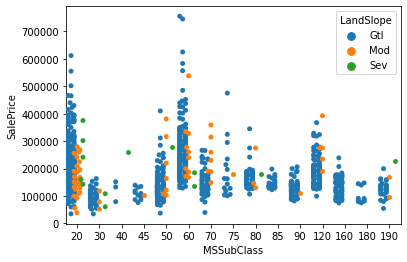

In [394]:
sns.swarmplot("MSSubClass","SalePrice",data=train,hue="LandSlope",dodge=True)

##"LotFrontage"

In [395]:
# 欠損値の確認
train.isnull().sum()

SalePrice          0
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 81, dtype: int64

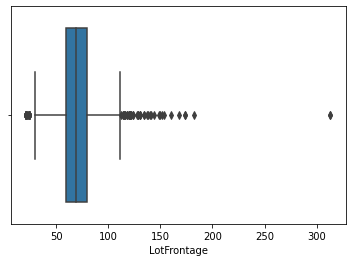

In [396]:
sns.boxplot(train["LotFrontage"])
plt.show()

In [397]:
train["LotFrontage"]=train["LotFrontage"].fillna(train["LotFrontage"].median())

##"MasVnrArea"

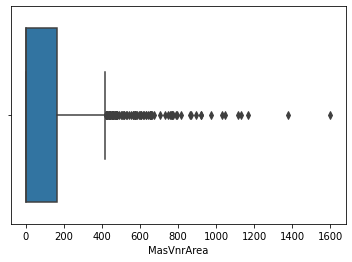

In [398]:
sns.boxplot(train["MasVnrArea"])
plt.show()

In [399]:
train["MasVnrArea"]=train["MasVnrArea"].fillna(train["MasVnrArea"].median())

##"MasVnrType"

In [400]:
train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [401]:
train.groupby("MasVnrType").SalePrice.mean()

MasVnrType
BrkCmn     146318.066667
BrkFace    204691.871910
None       156221.891204
Stone      265583.625000
Name: SalePrice, dtype: float64

In [402]:
train.loc[train["MasVnrType"].isnull(),"SalePrice"]

234     216500
529     200624
650     205950
936     184900
973     182000
977     199900
1243    465000
1278    237000
Name: SalePrice, dtype: int64

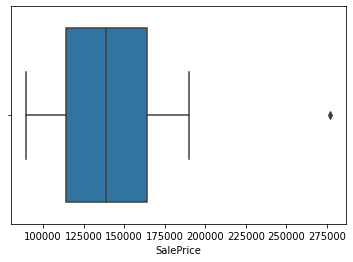

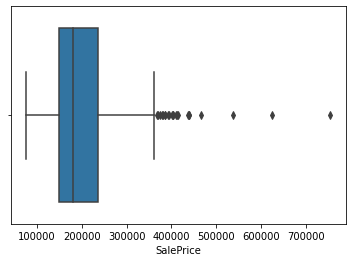

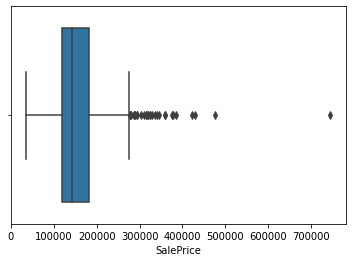

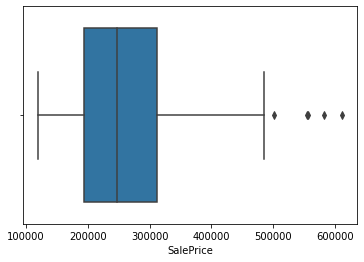

In [403]:
for i in ["BrkCmn","BrkFace","None","Stone"]:
  x=train.loc[train["MasVnrType"]==i,"SalePrice"]
  sns.boxplot(x)
  plt.show()

In [404]:
train.loc[train["MasVnrType"].isnull(),"MasVnrType"]="BrkFace"

##"BsmtQual"

In [405]:
train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [406]:
train.groupby("BsmtQual").SalePrice.mean()

BsmtQual
Ex    327041.041322
Fa    115692.028571
Gd    202688.478964
TA    140759.818182
Name: SalePrice, dtype: float64

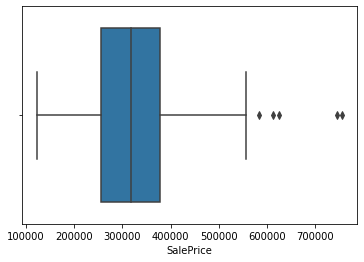

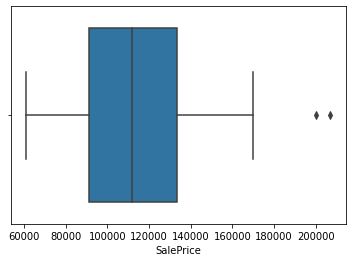

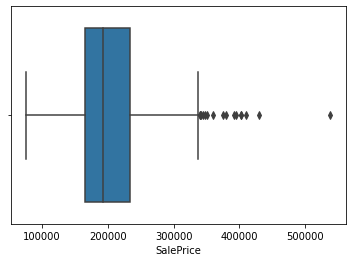

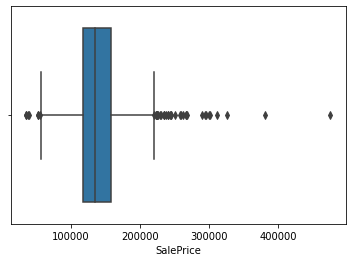

In [407]:
for i in ["Ex","Fa","Gd","TA"]:
  x=train.loc[train["BsmtQual"]==i,"SalePrice"]
  sns.boxplot(x)
  plt.show()

In [408]:
train.loc[train.BsmtQual.isnull(),"SalePrice"]

17       90000
39       82000
90      109900
102     118964
156     109500
182     120000
259      97000
342      87500
362     198500
371     134432
392     106500
520     106250
532     107500
533      39300
553     108000
646      98300
705      55000
736      93500
749      98000
778     144000
868     169000
894     118858
897     142953
984     126000
1000     82000
1011    100000
1035     84000
1045    139600
1048    115000
1049     84900
1090     92900
1179     93000
1216    112000
1218     80500
1232    101800
1321     72500
1412     90000
Name: SalePrice, dtype: int64

In [409]:
train.loc[train.BsmtQual.isnull() & train.SalePrice>=169000,"BsmtQual"]="Gd"
train.loc[train.BsmtQual.isnull() & train.SalePrice<169000,"BsmtQual"]="TA"

##"BsmtCond"

In [410]:
train.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [411]:
train.loc[train.BsmtCond.isnull(),"BsmtCond"]="TA"

##"BsmtExposure"

In [412]:
train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

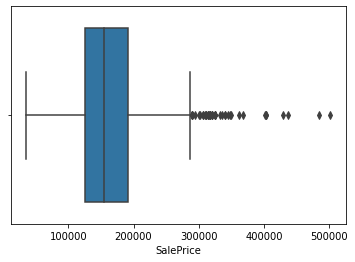

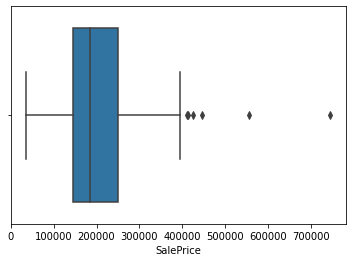

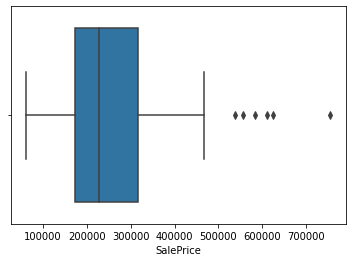

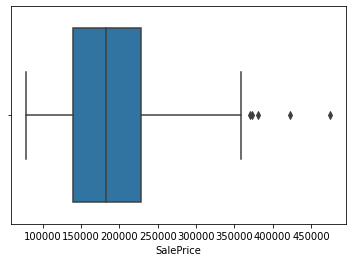

In [413]:
for i in ["No","Av","Gd","Mn"]:
  x=train.loc[train.BsmtExposure==i,"SalePrice"]
  sns.boxplot(x)
  plt.show()


In [414]:
train.loc[train.BsmtExposure.isnull(),"SalePrice"]

17       90000
39       82000
90      109900
102     118964
156     109500
182     120000
259      97000
342      87500
362     198500
371     134432
392     106500
520     106250
532     107500
533      39300
553     108000
646      98300
705      55000
736      93500
749      98000
778     144000
868     169000
894     118858
897     142953
948     192500
984     126000
1000     82000
1011    100000
1035     84000
1045    139600
1048    115000
1049     84900
1090     92900
1179     93000
1216    112000
1218     80500
1232    101800
1321     72500
1412     90000
Name: SalePrice, dtype: int64

In [415]:
train.loc[train.BsmtExposure.isnull() & train.SalePrice>=169000,"BsmtExposure"]="Gd"
train.loc[train.BsmtExposure.isnull() & train.SalePrice<169000,"BsmtExposure"]="No"

##BsmtFinType

In [416]:
train.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [417]:
train.BsmtFinType1.value_counts().keys()

Index(['Unf', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'], dtype='object')

Unf


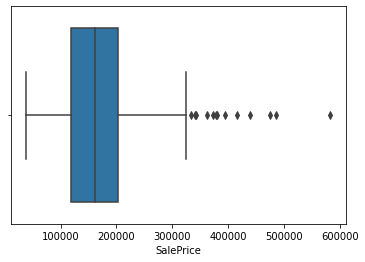

GLQ


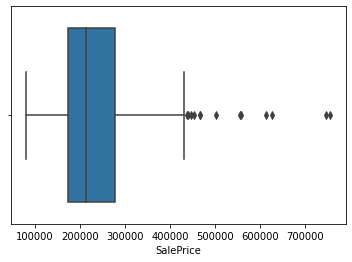

ALQ


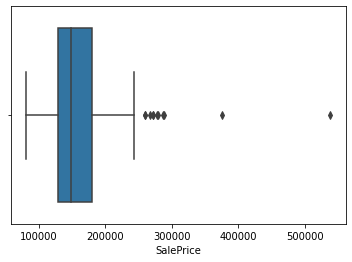

BLQ


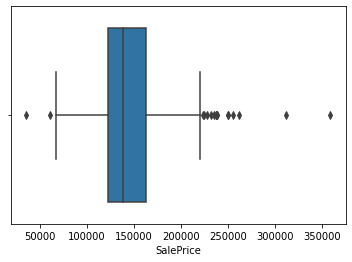

Rec


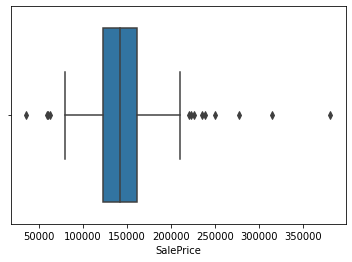

LwQ


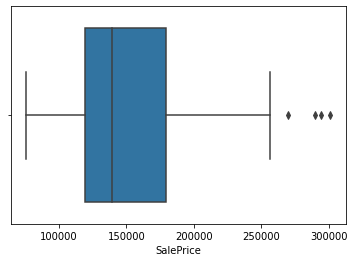

In [418]:
for i in ['Unf', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ']:
  x=train.loc[train.BsmtFinType1==i,"SalePrice"]
  print(i)
  sns.boxplot(x)
  plt.show()


In [419]:
train.groupby("BsmtFinType1")["SalePrice"].mean()

BsmtFinType1
ALQ    161573.068182
BLQ    149493.655405
GLQ    235413.720096
LwQ    151852.702703
Rec    146889.248120
Unf    170670.576744
Name: SalePrice, dtype: float64

In [420]:
train.loc[train.BsmtFinType1.isnull() & train.SalePrice>=200000,"BsmtFinType1"]="GLQ"
train.loc[train.BsmtFinType1.isnull() & train.SalePrice<200000,"BsmtFinType1"]="Unf"

In [421]:
train.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [422]:
train.loc[train.BsmtFinType2.isnull() ,"BsmtFinType2"]="Unf"

##"Electrical"


In [423]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [424]:
train.loc[train.Electrical.isnull(),"Electrical"]="SBrkr"

##"Garage"

In [425]:
train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [426]:
train.GarageType.value_counts().keys()

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

Attchd


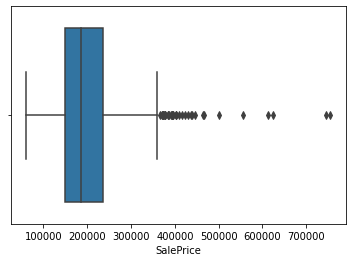

Detchd


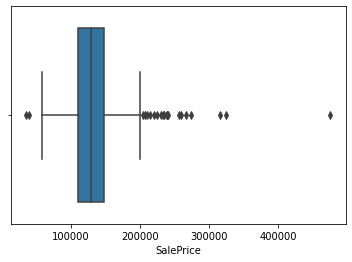

BuiltIn


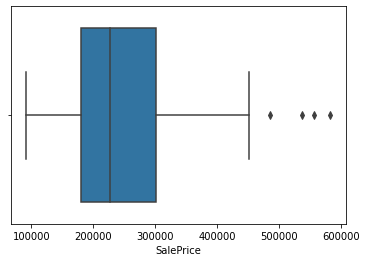

Basment


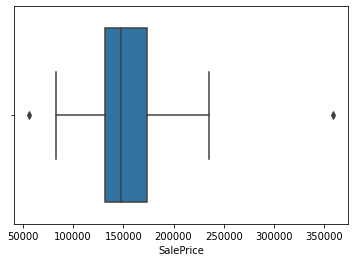

CarPort


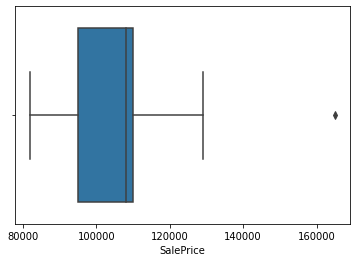

2Types


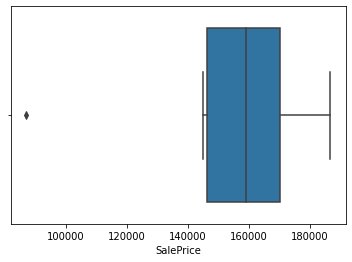

In [427]:
for i in ['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types']:
  sns.boxplot(train.loc[train.GarageType==i,"SalePrice"])
  print(i)
  plt.show()

In [428]:
train.loc[train.GarageType.isnull(),"GarageType"]="Attchd"

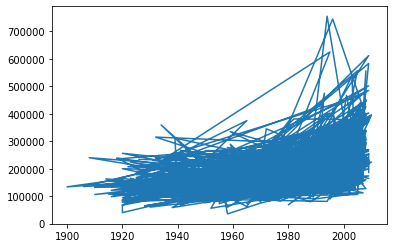

In [429]:
#GarageYrBlt
plt.plot(train.GarageYrBlt,train.SalePrice)

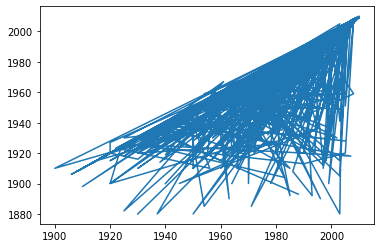

In [430]:
plt.plot(train.GarageYrBlt,train.YearBuilt)

In [431]:
from sklearn.linear_model import LinearRegression

model_YrBlt = LinearRegression()
GarageYrBlt_isnull=train.GarageYrBlt.isnull()
x=train.loc[train.GarageYrBlt.isnull()==False,"YearBuilt"].values.reshape(-1, 1)
y=train.loc[train.GarageYrBlt.isnull()==False,"GarageYrBlt"].values.reshape(-1, 1)
model_YrBlt.fit(x,y)

pred = model_YrBlt.predict(train.loc[train.GarageYrBlt.isnull(),["YearBuilt"]])
train.loc[GarageYrBlt_isnull, "GarageYrBlt"] = pred

# inp=model_YrBlt.predict(train.loc[train.GarageYrBlt.isnull(),"YearBuilt"].values.reshape(-1, 1))
# inp=inp.reshape(-1)
# s = pd.Series(inp)
# print(s)
# train.loc[train.GarageYrBlt.isnull(),"GarageYrBlt"]=s.values


In [432]:
type(train.YearBuilt)

pandas.core.series.Series

In [433]:
train.loc[train.GarageYrBlt.isnull(),"GarageYrBlt"]

Series([], Name: GarageYrBlt, dtype: float64)

In [434]:
# for i in train.loc[train.GarageYrBlt.isnull(),"GarageYrBlt"]:
#   1

# reg = LinearRegression()
# ja_isna = tokai_reg.Japanese.isna()
# reg.fit(tokai_reg.loc[~ja_isna, ['English']], tokai_reg.loc[~ja_isna, 'Japanese'])
# pred = reg.predict(tokai_reg.loc[ja_isna, ['English']])
# tokai_reg.loc[ja_isna, 'Japanese'] = pred

In [435]:
# GarageFinish

In [436]:
train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [437]:
train.groupby("GarageFinish").GarageYrBlt.mean()

GarageFinish
Fin    1993.767045
RFn    1987.481043
Unf    1963.366942
Name: GarageYrBlt, dtype: float64

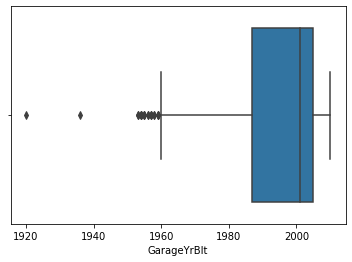

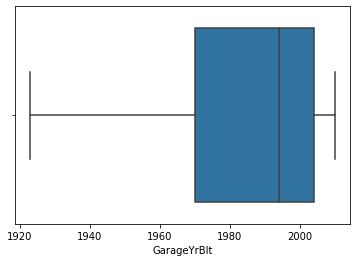

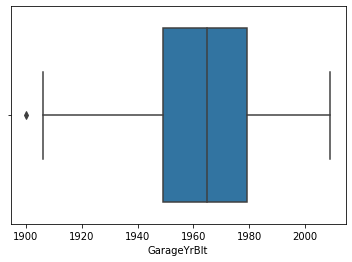

In [438]:
for i in ["Fin","RFn","Unf"]:
  x=train.loc[train.GarageFinish==i,"GarageYrBlt"]
  sns.boxplot(x)
  plt.show()


In [439]:
train.loc[train.GarageFinish.isnull() & train.GarageYrBlt>=1993.767045,"GarageFinish"]="Fin"
train.loc[train.GarageFinish.isnull() & train.GarageYrBlt<1963.366942,"GarageFinish"]="Unf"
train.loc[train.GarageFinish.isnull() ,"GarageFinish"]="RFn"

In [440]:
# GarageQual

In [441]:
train.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [442]:
train.loc[train.GarageQual.isnull() ,"GarageQual"]="TA"

In [443]:
#GarageCond

In [444]:
train.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [445]:
train.loc[train.GarageCond.isnull() ,"GarageCond"]="TA"

In [446]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1460 non-null   int64  
 1   Id             1460 non-null   int64  
 2   MSSubClass     1460 non-null   int64  
 3   MSZoning       1460 non-null   object 
 4   LotFrontage    1460 non-null   float64
 5   LotArea        1460 non-null   int64  
 6   Street         1460 non-null   object 
 7   Alley          91 non-null     object 
 8   LotShape       1460 non-null   object 
 9   LandContour    1460 non-null   object 
 10  Utilities      1460 non-null   object 
 11  LotConfig      1460 non-null   object 
 12  LandSlope      1460 non-null   object 
 13  Neighborhood   1460 non-null   object 
 14  Condition1     1460 non-null   object 
 15  Condition2     1460 non-null   object 
 16  BldgType       1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  OverallQ

##KNNで欠損値補完

In [ ]:
# #testの欠損値処理処理 KNNで欠損値補完
# from sklearn.impute import KNNImputer

# test_knn = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(test))
# test_knn.columns = test.columns
# print(test_knn.info())

##カテゴリ変数の変換

In [222]:
train=pd.get_dummies(train, drop_first=True)
test=pd.get_dummies(test, drop_first=True)

In [170]:
train.columns[-1]

'GarageFinish_Unf'

##分析
多くの機械学習アルゴリズムは正規分布のデータを想定しているため、正規分布ではないデータに対して精度が出ない場合が多いです。
そのとき、正規分布に従わない変数の対数変換をすると正規分布に近付くことがあります。
(対数変換を行うことで正規分布になるような分布を、対数正規分布と呼ぶ。)

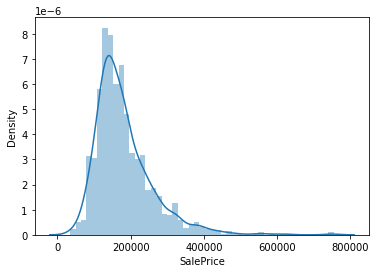

In [46]:
import seaborn as sns
sns.distplot(train['SalePrice'])

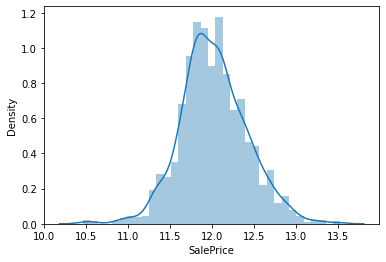

In [47]:
sns.distplot(np.log(train['SalePrice']))

##正規化

In [88]:
import pandas as pd
import scipy.stats
from sklearn import preprocessing

In [89]:
train.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,1,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,181500.0,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,1,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,223500.0,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,1,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,140000.0,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,1,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,250000.0,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,1,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [90]:
tr_X=train[train.columns[1:]]
te_X=test[test.columns[1:]]
train_std=scipy.stats.zscore(tr_X)
test_std=scipy.stats.zscore(te_X)

In [91]:
train_std_df = pd.DataFrame(train_std,index=tr_X.index, columns=tr_X.columns)
test_std_df = pd.DataFrame(test_std,index=te_X.index, columns=te_X.columns)

In [92]:
train_std_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.212720,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.020003,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-0.215859,-0.105263,0.518133,-0.418955,...,-0.117851,-0.522385,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,1.568348,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.037037,-0.045376,-0.195977,0.304655,-0.087129,-0.037037,0.058621,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.468158,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.105624,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,-0.215859,-0.105263,0.518133,-0.418955,...,-0.117851,1.914298,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,1.568348,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.037037,-0.045376,-0.195977,0.304655,-0.087129,-0.037037,0.058621,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.076544,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.936623,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,-0.215859,-0.105263,0.518133,-0.418955,...,-0.117851,1.914298,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,1.568348,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.037037,-0.045376,-0.195977,0.304655,-0.087129,-0.037037,0.058621,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.439679,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.811554,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.215859,-0.105263,0.518133,-0.418955,...,-0.117851,-0.522385,-1.366883,-0.114827,-0.253259,-0.078757,1.665116,-0.637614,1.062205,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.037037,-0.045376,-0.1959

In [93]:
##相関関係確認
df_co = pd.concat([train[train.columns[0]], train_std_df], axis=1)
df_co.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,0.073375,-0.212720,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.020003,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-0.215859,-0.105263,0.518133,...,-0.117851,-0.522385,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,1.568348,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.037037,-0.045376,-0.195977,0.304655,-0.087129,-0.037037,0.058621,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,181500.0,-0.872563,0.468158,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.105624,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,-0.215859,-0.105263,0.518133,...,-0.117851,1.914298,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,1.568348,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.037037,-0.045376,-0.195977,0.304655,-0.087129,-0.037037,0.058621,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,223500.0,0.073375,-0.076544,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.936623,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,-0.215859,-0.105263,0.518133,...,-0.117851,1.914298,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,1.568348,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.037037,-0.045376,-0.195977,0.304655,-0.087129,-0.037037,0.058621,-0.02618,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,140000.0,0.309859,-0.439679,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.811554,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.215859,-0.105263,0.518133,...,-0.117851,-0.522385,-1.366883,-0.114827,-0.253259,-0.078757,1.665116,-0.637614,1.062205,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.037037,-0.045376,-0.195977,0.3

In [94]:
df_co.corr().style.background_gradient("summer_r")

Output hidden; open in https://colab.research.google.com to view.

In [28]:
df_corr = df_co.corr()

df_corr_price = df_corr[np.abs(df_corr) > 0.4].SalePrice

list_corr_price = df_corr_price.tolist()

removelist=[i for i, x in enumerate(list_corr_price) if np.isnan(x) == True]


In [29]:
df_co_columns_values = df_co.columns.values

In [30]:
list_co_columns=[]
for i in removelist:
  list_co_columns.append(df_co_columns_values[i]) #['MSSubClass',...

df_co_train= df_co.drop(list_co_columns,axis=1)
print(df_co_train)

df_co_test= test_std_df.drop(list_co_columns,axis=1)
print(df_co_test)


      SalePrice  OverallQual  ...  KitchenQual_TA  GarageFinish_Unf
0      208500.0     0.651479  ...       -1.006873         -0.941438
1      181500.0    -0.071836  ...        0.993174         -0.941438
2      223500.0     0.651479  ...       -1.006873         -0.941438
3      140000.0     0.651479  ...       -1.006873          1.062205
4      250000.0     1.374795  ...       -1.006873         -0.941438
...         ...          ...  ...             ...               ...
1455   175000.0    -0.071836  ...        0.993174         -0.941438
1456   210000.0    -0.071836  ...        0.993174          1.062205
1457   266500.0     0.651479  ...       -1.006873         -0.941438
1458   142125.0    -0.795151  ...       -1.006873          1.062205
1459   147500.0    -0.795151  ...        0.993174         -0.941438

[1460 rows x 22 columns]
      OverallQual  YearBuilt  ...  KitchenQual_TA  GarageFinish_Unf
0       -0.751101  -0.340945  ...        0.961666          1.037011
1       -0.054877  -0.

In [33]:
df_co_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SalePrice             1460 non-null   float64
 1   OverallQual           1460 non-null   float64
 2   YearBuilt             1460 non-null   float64
 3   YearRemodAdd          1460 non-null   float64
 4   MasVnrArea            1460 non-null   float64
 5   TotalBsmtSF           1460 non-null   float64
 6   1stFlrSF              1460 non-null   float64
 7   GrLivArea             1460 non-null   float64
 8   FullBath              1460 non-null   float64
 9   TotRmsAbvGrd          1460 non-null   float64
 10  Fireplaces            1460 non-null   float64
 11  GarageYrBlt           1460 non-null   float64
 12  GarageCars            1460 non-null   float64
 13  GarageArea            1460 non-null   float64
 14  Neighborhood_NridgHt  1460 non-null   float64
 15  ExterQual_Gd         

In [31]:
test_std_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874711,0.559951,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063401,0.517537,-0.650473,-0.370719,-0.654561,-0.775254,-0.080483,-1.215588,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,-0.653107,-0.988189,1.185921,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,-0.231148,12.037442,-1.810688,-0.445926,...,0.302075,-0.147339,-0.794979,0.961666,-0.052432,-0.154466,-0.159056,-0.117892,-0.026189,0.271263,0.755318,-0.108578,-0.268339,-0.06426,-0.606123,-0.602952,1.037011,-0.234421,-0.083074,-0.03705,0.253351,-0.165725,-0.06426,-0.069433,0.194154,-0.149749,0.34849,-0.074253,-0.045392,-0.108578,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-0.874711,0.608600,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063489,-0.297689,-0.339237,0.639228,0.433298,-0.775254,-0.080483,-0.323539,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.255371,-0.898055,-0.769806,-0.988189,-0.741235,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,-0.231148,-0.083074,0.552276,-0.445926,...,0.302075,-0.147339,1.257895,-1.039862,-0.052432,-0.154466,-0.159056,-0.117892,-0.026189,0.271263,0.755318,-0.108578,-0.268339,-0.06426,-0.606123,-0.602952,1.037011,-0.234421,-0.083074,-0.03705,0.253351,-0.165725,-0.06426,-0.069433,0.194154,-0.149749,0.34849,-0.074253,-0.045392,-0.108578,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,0.061351,0.268055,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773354,-0.297689,-0.954844,-0.266787,-0.574165,0.891944,-0.080483,0.294508,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.255371,0.647066,0.747276,0.301406,0.042537,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,-0.231148,-0.083074,0.552276,-0.445926,...,0.302075,-0.147339,-0.794979,0.961666,-0.052432,-0.154466,-0.159056,-0.117892,-0.026189,0.271263,0.755318,-0.108578,-0.268339,-0.06426,-0.606123,-0.602952,-0.964310,-0.234421,-0.083074,-0.03705,0.253351,-0.165725,-0.06426,-0.069433,0.194154,-0.149749,0.34849,-0.074253,-0.045392,-0.108578,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,0.061351,0.462652,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357932,-0.297689,-0.526894,-0.271306,-0.579190,0.837243,-0.080483,0.243004,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.407593,0.647066,0.786176,0.301406,-0.012788,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,-0.231148,-0.083074,0.552276,-0.445926,...,0.302075,-0.147339,1.257895,-1.039862,-0.052432,-0.154466,-0.159056,-0.117892,-0.026189,0.271263,0.755318,-0.108578,-0.268339,-0.06426,-0.606123,-0.602952,-0.964310,-0.234421,-0.083074,-0.03705,0.253351

##ランダムフォレスト

In [683]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
 
from sklearn.model_selection import train_test_split, GridSearchCV

In [684]:
#tr_train,tr_testに振り分けられるデータはランダムに決まる
# random_state = 1234　は振り分け方を固定するための値
tr_train,tr_test=train_test_split(train, test_size=0.3, random_state = 1234) 

In [685]:
train.columns[0]

'SalePrice'

In [686]:
tr_train['SalePrice']

1017    187500.0
405     150000.0
6       307000.0
388     191000.0
501     226700.0
          ...   
1228    367294.0
1077    138800.0
1318    275000.0
723     135000.0
815     224900.0
Name: SalePrice, Length: 1022, dtype: float64

In [687]:
#訓練用の説明変数
train_X=tr_train[train.columns[1:]]
#訓練用の目的変数
train_Y=tr_train[train.columns[0]]

# 評価用の説明変数
test_X=tr_test[train.columns[1:]]
# 評価用の目的変数
test_Y=tr_test[train.columns[0]]

In [693]:
test_Y_list=test_Y.tolist()
test_Y_list

[205000.0,
 345000.0,
 173900.0,
 93500.0,
 265900.0,
 212000.0,
 221000.0,
 102000.0,
 290000.0,
 140000.0,
 145000.0,
 159500.0,
 140000.0,
 149000.0,
 238000.0,
 277500.0,
 174000.0,
 202500.0,
 130000.0,
 159950.0,
 148000.0,
 135000.0,
 85000.0,
 113000.0,
 235128.0,
 246578.0,
 333168.0,
 155835.0,
 318061.0,
 144000.0,
 271900.0,
 147000.0,
 315750.0,
 137000.0,
 118400.0,
 315000.0,
 177000.0,
 177500.0,
 119000.0,
 136500.0,
 139900.0,
 144000.0,
 133000.0,
 222000.0,
 167000.0,
 148000.0,
 82500.0,
 149900.0,
 118000.0,
 104000.0,
 217000.0,
 190000.0,
 107500.0,
 130000.0,
 426000.0,
 153337.0,
 79500.0,
 147000.0,
 173000.0,
 268000.0,
 230000.0,
 154000.0,
 175500.0,
 106500.0,
 190000.0,
 79900.0,
 193000.0,
 176000.0,
 171000.0,
 86000.0,
 136900.0,
 144500.0,
 212000.0,
 181000.0,
 181000.0,
 156932.0,
 106000.0,
 370878.0,
 171000.0,
 128500.0,
 120500.0,
 325000.0,
 168500.0,
 123500.0,
 180000.0,
 315500.0,
 226000.0,
 232000.0,
 124000.0,
 187500.0,
 81000.0,
 14000

In [689]:
model=RandomForestRegressor(n_jobs=-1, random_state=2525)
model.fit(train_X,train_Y)

RandomForestRegressor(n_jobs=-1, random_state=2525)

In [696]:
predict= model.predict(test_X)
# print(predict)
# model.score(predict, test_Y_matrix)
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test_Y_list, predict.T))
rmse

25184.1064852804

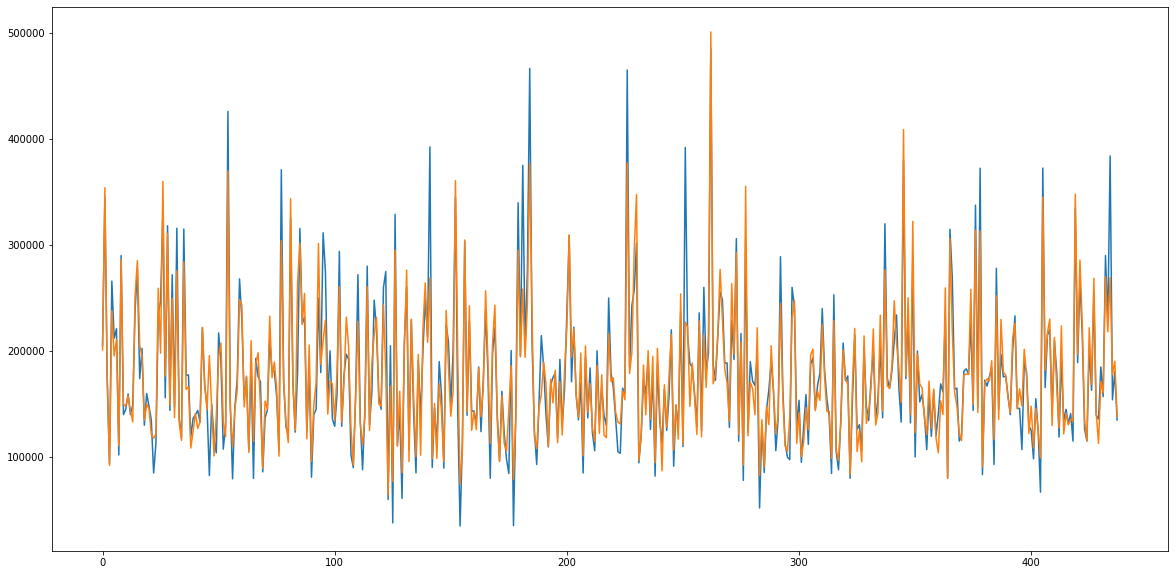

In [699]:
plt.figure(figsize=(20,10))
plt.plot(test_Y_list)
plt.plot(predict.T)

In [738]:
##K分割分割　交差検証

# KFold交差検証のライブラリ、交差検証のスコアを求めるライブラリ、および交差検証による予測に関するライブラリをimport
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer
# 分割数n_splits, ランダム性の固定を行うrandom_state:seed的な, データのシャッフルを行うかを指定するshuffleを引数に与える
kf=KFold(n_splits=5,random_state=30,shuffle=True)
#訓練用の説明変数
x=train[train.columns[1:]]
#訓練用の目的変数
y=train[train.columns[0]]

def rmse_score(y_true, y_pred):
    """RMSE (Root Mean Square Error: 平均二乗誤差平方根) を計算する関数"""
    # print(y_true, y_pred.reshape(-1,1).shape)#(292,)→→(292,1)
    
    # y_true_list=y_true.tolist()#[208500.0, 140000.0,...
    y_true_array=np.array(y_true)
    # print(y_true_array,y_pred)#<class 'numpy.ndarray'>
    # y_pred_list=y_pred.tolist()
    # print(y_pred_list)
    # y_pred_T=y_pred
    # # print(y_true_list)
    mse = mean_squared_error(y_true_array, y_pred)
    rmse = np.sqrt(mse)
    return rmse


# クロスバリデーションで得られるスコアを代入
# 予測に使うモデル、説明変数、目的変数、および作成したKFoldのパラメータを引数に与える
# cv_result = cross_val_score(model, x, y, cv = kf,scoring=score_funcs)
cv_result = cross_validate(model, x, y, cv = kf,scoring=score_funcs)
print("cv: {}".format(cv_result))
# 分割数の分だけ精度が得られるので、平均値をとれば全体の精度が確認可能
print("RMSE：{}".format(cv_result['test_rmse'].mean()))

cv: {'fit_time': array([2.09798288, 2.11680079, 2.0859046 , 2.09830117, 2.10019946]), 'score_time': array([0.10645628, 0.1062603 , 0.10637283, 0.10618854, 0.10627747]), 'test_rmse': array([36152.9179034 , 25189.8523648 , 25974.16100043, 45503.63334088,
       26258.48236081])}
RMSE：31815.809394065138


In [ ]:
#交差検証を用いたグリッドサーチを実装した GridSearchCV クラス

In [740]:
##GRID SEARCH
search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
    # 'max_features'      : [i for i in range(1,train_X.shape[1])],
    'random_state'      : [2525],
    # 'n_jobs'            : [1],
    # 'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'max_depth'         : [3, 5, 10, 25, 40, 75, 100]
}
 
gsr = GridSearchCV(
    RandomForestRegressor(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
 
gsr.fit(train_X, train_Y)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 25, 40, 75, 100],
                         'n_estimators': [5, 10, 20, 30, 50, 100, 300]},
             verbose=True)

In [743]:
print('The best parameter = ',gsr.best_params_)
print('RMSE = ',-gsr.best_score_)
print()
RF = RandomForestRegressor(random_state=2525,n_estimators=gsr.best_params_["n_estimators"], max_depth=gsr.best_params_["max_depth"])

The best parameter =  {'max_depth': 10, 'n_estimators': 100}
RMSE =  -0.8411990565758359



###test用のデータセット(test.csv)をこのモデルに従って分類。 また、分類結果を提出する形式にまとめる(csv形式)

In [751]:
test[test.columns[1:]]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1979.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1979.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [752]:
model_RF=RF

model_RF.fit(train[train.columns[1:]], train[train.columns[0]])

test_prediction=model_RF.predict(test[test.columns[1:]])

In [754]:
# kaggleの課題として PassengerId 1461 ~ 2919 を予測することが要求されているため
# idを生成しておく
id = np.arange(1461,2920)

In [755]:
# Idと予測結果をデータフレーム化
test_result = pd.DataFrame( { 'Id': id , 'SalePrice': test_prediction } )
print(test_result.head(10))

     Id      SalePrice
0  1461  128169.691637
1  1462  152671.285075
2  1463  178034.489999
3  1464  181036.180808
4  1465  200706.683826
5  1466  181610.672278
6  1467  164551.592396
7  1468  174678.519941
8  1469  183059.973413
9  1470  117730.214677


In [757]:
# 生成したデータフレームをcsvとして保存
test_result.to_csv( '/content/drive/MyDrive/Colab Notebooks/Kaggle/house-prices-advanced-regression-techniques/housePrice_forsubmisson.csv' , index = False )

#DeepNN

In [28]:
# import libraries
import numpy as np
import pandas as pds
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer

##KerasのKerasRegressorというAPIを使って重回帰分析

In [29]:
# create regression model
def reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(loss='root_mean_squared_error', optimizer='adam')
    return model

In [ ]:
# #ここまでは従来のKerasそのままです。
# 従来との違いは学習する際のfitの書き方です。
# 学習する方法は概ね2通りあります。
# 1.トレーニングデータとテストデータを分けて学習
# 2.交差検証で学習
# 回帰分析で一般的な方法が使えるようです。


In [154]:
# def rmse_score(y_true, y_pred):
#     """RMSE (Root Mean Square Error: 平均二乗誤差平方根) を計算する関数"""
#     print(y_true,y_pred)
#     # y_true_array=np.array(y_true)
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     return rmse

# score_funcs = {
#         'rmse': make_scorer(rmse_score),
#     }






# # use Kfold and cross validation to run the model
# seed = 7
# # np.random.seed(seed)
# estimator = KerasRegressor(build_fn=reg_model, epochs=100, batch_size=10, verbose=0)
# kfold = KFold(n_splits=10, random_state=0,shuffle=True)

# # show its root mean square error
# X=train_std_df.values
# Y=train[train.columns[0]].values
X=df_co_train[df_co_train.columns[1:]].values
Y=df_co_train[df_co_train.columns[0]].values
print(Y.shape)
print(X.shape)
# results = cross_val_score(estimator, X, Y, scoring='neg_mean_squared_error', cv=kfold)
# results
# # mse = -results.mean()
# # print("KERAS REG RMSE : %.2f" % (mse ** 0.5))

# # print("cv: {}".format(results))
# # 分割数の分だけ精度が得られるので、平均値をとれば全体の精度が確認可能
# # print("RMSE：{}".format(results['test_rmse'].mean()))


(1460,)
(1460, 57)


In [180]:
import tensorflow as tf
from tensorflow import keras

# X=train_std_df.values
# Y=train[train.columns[0]].values

##相関係数小さいやつのぞいたver.
X=df_co_train[df_co_train.columns[1:]].values
Y=df_co_train[df_co_train.columns[0]].values



def build_model():
  model = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.001), 
                       activation=tf.nn.relu,
                       input_shape=(X.shape[1],)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),

    keras.layers.Dense(1)
  ])
 
  # optimizer = tf.train.RMSPropOptimizer(0.001)
 
  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mse'])
  return model
 
model = build_model()
model.summary()

Model: "sequential_245"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_757 (Dense)           (None, 32)                1856      
                                                                 
 dense_758 (Dense)           (None, 16)                528       
                                                                 
 dense_759 (Dense)           (None, 1)                 17        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [181]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
 
EPOCHS = 2000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
# Store training stats
history = model.fit(X, Y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop,PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

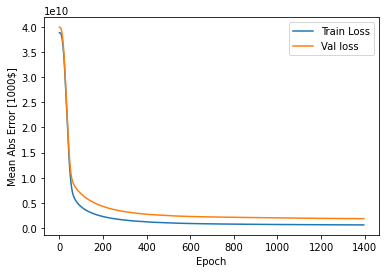

In [182]:
import matplotlib.pyplot as plt
 
 
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mse']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mse']),
           label = 'Val loss')
  plt.legend()
  # plt.ylim([0,5])
 
plot_history(history)

##データ提出

In [183]:
# model=build_model()

# model.fit(df_co_train.values, df_co_train[df_co_train.columns[0]].values)

test_prediction = model.predict(df_co_test.values)

In [188]:
test_prediction
test_prediction_list=test_prediction.tolist()
test_prediction_1d = sum(test_prediction_list, [])
test_prediction_1d

[114171.921875,
 166730.59375,
 184297.046875,
 185396.71875,
 182940.796875,
 178673.65625,
 179667.953125,
 169368.25,
 205258.53125,
 124612.5234375,
 208246.28125,
 89414.1796875,
 96490.9140625,
 145572.34375,
 119304.7578125,
 382625.78125,
 274633.84375,
 310464.78125,
 270760.59375,
 465243.84375,
 302076.6875,
 214938.453125,
 176043.25,
 162274.59375,
 187215.328125,
 207350.640625,
 326190.78125,
 237602.140625,
 199042.3125,
 229164.375,
 199458.21875,
 109826.9453125,
 211672.21875,
 301905.03125,
 312634.15625,
 248216.875,
 187931.78125,
 156851.5,
 159044.109375,
 148737.21875,
 170020.171875,
 157947.6875,
 256440.0625,
 241349.109375,
 225826.9375,
 175877.03125,
 268672.75,
 216470.109375,
 156608.75,
 131630.578125,
 137588.859375,
 156216.84375,
 152630.03125,
 183504.4375,
 215510.0625,
 155995.875,
 178358.0625,
 142568.359375,
 225323.390625,
 149900.953125,
 152794.125,
 160948.28125,
 120221.1484375,
 122640.7109375,
 125062.703125,
 129676.40625,
 113911.6015

In [189]:
# kaggleの課題として PassengerId 1461 ~ 2919 を予測することが要求されているため
# idを生成しておく
id = np.arange(1461,2920)

# Idと予測結果をデータフレーム化
test_result = pd.DataFrame( { 'Id': id , 'SalePrice': test_prediction_1d } )
print(test_result.head(10))

     Id      SalePrice
0  1461  114171.921875
1  1462  166730.593750
2  1463  184297.046875
3  1464  185396.718750
4  1465  182940.796875
5  1466  178673.656250
6  1467  179667.953125
7  1468  169368.250000
8  1469  205258.531250
9  1470  124612.523438


In [190]:
# 生成したデータフレームをcsvとして保存
test_result.to_csv( '/content/drive/MyDrive/Colab Notebooks/Kaggle/house-prices-advanced-regression-techniques/DNN_housePrice_forsubmisson.csv' , index = False )

#XGBoost

In [19]:
!pip install xgboost

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [70]:
train.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,1,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,181500.0,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,1,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,223500.0,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,1,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,140000.0,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,1,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,250000.0,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,1,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [71]:
#学習データを説明変数と目的変数に分ける
# X=df_co_train[df_co_train.columns[1:]].values
# Y=df_co_train[df_co_train.columns[0]].values
X=train[train.columns[1:]].values
Y=train[train.columns[0]].values

# データを訓練データと正解データに7:3で分ける
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

#データをXGB専用のデータ型に変換
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [73]:
# パラメーター設定
# 【パラメータの説明】
# objective：最小化させるべき損失関数の指定。デフォルトはlinear。'binary:logistic'とかも
# max_depth：決定木の深さ
# eta:学習率
# silent：モデル実行のログのはき方の指定。デフォルトは0（ログを出力する）
# eval_metric：データの評価指標。rmseやloglossがある
params = {'max_depth': 100, 
          'eta': 0.3, 
        'objective': 'reg:squarederror',
        'silent':0, 
        'random_state':1234, 
        # 学習用の指標 (RMSE)
        'eval_metric': 'rmse',
    }


#訓練データはdtrain、評価用のテストデータはdvalidと設定
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

In [74]:
# モデル訓練
#early_stopping_rounds：N回連続して評価指標が改善しなかったら学習を中断する
results_dict = {}

model = xgb.train(params,
                  dtrain,#訓練データ
                  early_stopping_rounds=20,
                  num_boost_round=100,
                  evals=watchlist,
                  evals_result = results_dict,
                 )

[0]	train-rmse:143890	eval-rmse:134544
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[1]	train-rmse:103833	eval-rmse:97236.6
[2]	train-rmse:75493.1	eval-rmse:72135.2
[3]	train-rmse:55409.5	eval-rmse:55228.5
[4]	train-rmse:41112.1	eval-rmse:44977.5
[5]	train-rmse:30849	eval-rmse:39273.3
[6]	train-rmse:23349.7	eval-rmse:36021.2
[7]	train-rmse:17838.3	eval-rmse:34510.1
[8]	train-rmse:13704.7	eval-rmse:33948.8
[9]	train-rmse:10610.5	eval-rmse:33426.7
[10]	train-rmse:8269.02	eval-rmse:33237.5
[11]	train-rmse:6480.65	eval-rmse:33265
[12]	train-rmse:5111.12	eval-rmse:33323.3
[13]	train-rmse:4050.91	eval-rmse:33430.7
[14]	train-rmse:3249.8	eval-rmse:33453.1
[15]	train-rmse:2614.4	eval-rmse:33465.3
[16]	train-rmse:2121.26	eval-rmse:33443.3
[17]	train-rmse:1731.73	eval-rmse:33431.3
[18]	train-rmse:1418.43	eval-rmse:33453.1
[19]	train-rmse:1171.04	eval-rmse:33426.6
[20]	train-rmse:971.958	eval-rmse:33

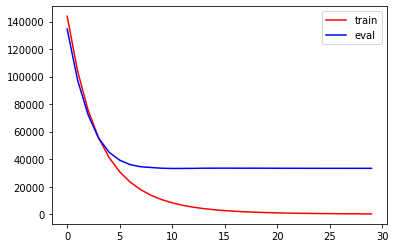

In [75]:
plt.plot(results_dict["train"]["rmse"], color = "red", label = "train")
plt.plot(results_dict["eval"]["rmse"], color = "blue", label = "eval")
plt.legend()
plt.show()

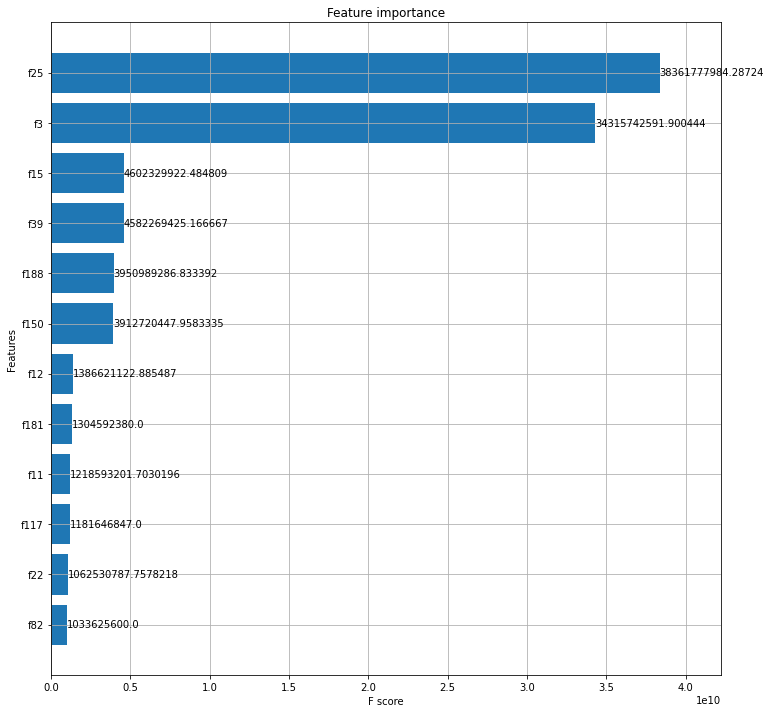

In [77]:
git, ax = plt.subplots(figsize=(12, 12))
xgb.plot_importance(model, importance_type = "gain", max_num_features=12, height=0.8, ax=ax)
plt.show()

##XGBoost +Optuna

In [ ]:
# XGBoost + Optunaでハイパーパラメータチューニングをしてみる
# OptunaはTree-structured Parzen Estimator というベイズ最適化アルゴリズムの一種を用いることで、効率的なパラメータ探索を行います。

In [21]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.3 MB/s 
     |████████████████████████████████| 80 kB 9.5 MB/s 
     |████████████████████████████████| 209 kB 44.2 MB/s 
     |████████████████████████████████| 75 kB 4.4 MB/s 
     |████████████████████████████████| 112 kB 45.3 MB/s 
     |████████████████████████████████| 149 kB 47.1 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ae5a8eefda9a20a36a0491b658b9e4dba8b8d23fc8cbe255dd52d0340e21aa55
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [22]:
import optuna

#学習データを説明変数と目的変数に分ける
# X=df_co_train[df_co_train.columns[1:]].values
# Y=df_co_train[df_co_train.columns[0]].values
X=train[train.columns[1:]].values
Y=train[train.columns[0]].values

# データを訓練データと正解データに7:3で分ける
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=0)

#データをXGB専用のデータ型に変換
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

def objective(trial):
  # 探索したいパラメータの範囲を記述 例えば、trial.suggest_int(“max_depth”, 6, 9)ならmax_depthを6,7,8,9の中で動かしながら探索
  params = {
        "silent": 0,
        "max_depth": trial.suggest_int("max_depth", 6, 9),
        "min_child_weight": 1,
        "eta": trial.suggest_loguniform("eta", 0.01, 1.0),
        "tree_method": "exact",
        "objective": 'reg:squarederror',
        "eval_metric": "rmse",
        # "predictor": "cpu_predictor" 
        'random_state':1234,  
    }
    # モデル定義、学習
  cv_results = xgb.cv(
      params,
      dtrain,
      num_boost_round=1000,
      seed=1234,
      nfold=5, # CVの分割数
      metrics={"rmse"},
      early_stopping_rounds=10
      )
    # 評価

  return cv_results["test-rmse-mean"].min()

study=optuna.create_study()
study.optimize(objective,n_trials=1000)

[I 2022-01-08 10:00:05,132] A new study created in memory with name: no-name-ffebda2f-c414-42e1-a638-ab4f23839dc3
[I 2022-01-08 10:00:11,367] Trial 0 finished with value: 28561.598827799997 and parameters: {'max_depth': 8, 'eta': 0.1266628221520687}. Best is trial 0 with value: 28561.598827799997.
[I 2022-01-08 10:00:14,089] Trial 1 finished with value: 29613.4414064 and parameters: {'max_depth': 9, 'eta': 0.15125888782536312}. Best is trial 0 with value: 28561.598827799997.
[I 2022-01-08 10:00:14,914] Trial 2 finished with value: 37750.1050782 and parameters: {'max_depth': 6, 'eta': 0.7829888844661709}. Best is trial 0 with value: 28561.598827799997.
[I 2022-01-08 10:00:38,463] Trial 3 finished with value: 29247.140625 and parameters: {'max_depth': 9, 'eta': 0.03295234561709342}. Best is trial 0 with value: 28561.598827799997.
[I 2022-01-08 10:00:46,230] Trial 4 finished with value: 27886.9683592 and parameters: {'max_depth': 6, 'eta': 0.06045682292706772}. Best is trial 4 with value:

In [23]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  1000
Best trial:
  Value: 27133.7964842
  Params: 
    max_depth: 6
    eta: 0.09457700780411775


In [ ]:
#チューニングのベストパラメータで再学習

In [32]:
#訓練データはdtrain、評価用のテストデータはdvalidと設定
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
params = {
      "silent": 0,
      "max_depth": 50,
      "min_child_weight": 1,
      "eta": 0.2,
      "tree_method": "exact",
      "objective": 'reg:squarederror',
      "eval_metric": "rmse",
      # "predictor": "cpu_predictor" 
      'random_state':1234,  
  }
# params["max_depth"] = trial.params["max_depth"]
# params["eta"] = trial.params["eta"]
results_dict = {}
model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=10000,
                  early_stopping_rounds=5,
                  evals=watchlist,
                  evals_result = results_dict,
                  )



ストリーミング出力は最後の 5000 行に切り捨てられました。
[5000]	train-rmse:0.027435	eval-rmse:31923.3
[5001]	train-rmse:0.027435	eval-rmse:31923.3
[5002]	train-rmse:0.027435	eval-rmse:31923.3
[5003]	train-rmse:0.027435	eval-rmse:31923.3
[5004]	train-rmse:0.027435	eval-rmse:31923.3
[5005]	train-rmse:0.027435	eval-rmse:31923.3
[5006]	train-rmse:0.027435	eval-rmse:31923.3
[5007]	train-rmse:0.027435	eval-rmse:31923.3
[5008]	train-rmse:0.027435	eval-rmse:31923.3
[5009]	train-rmse:0.027435	eval-rmse:31923.3
[5010]	train-rmse:0.027435	eval-rmse:31923.3
[5011]	train-rmse:0.027435	eval-rmse:31923.3
[5012]	train-rmse:0.027435	eval-rmse:31923.3
[5013]	train-rmse:0.027435	eval-rmse:31923.3
[5014]	train-rmse:0.027435	eval-rmse:31923.3
[5015]	train-rmse:0.027435	eval-rmse:31923.3
[5016]	train-rmse:0.027435	eval-rmse:31923.3
[5017]	train-rmse:0.027435	eval-rmse:31923.3
[5018]	train-rmse:0.027435	eval-rmse:31923.3
[5019]	train-rmse:0.027435	eval-rmse:31923.3
[5020]	train-rmse:0.027435	eval-rmse:31923.3
[5021]	train-rmse:0.027

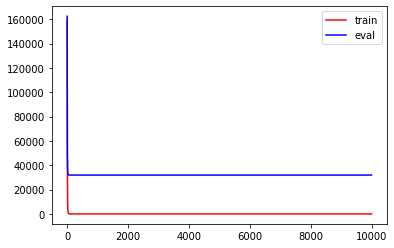

In [33]:
plt.plot(results_dict["train"]["rmse"], color = "red", label = "train")
plt.plot(results_dict["eval"]["rmse"], color = "blue", label = "eval")
plt.legend()
plt.show()

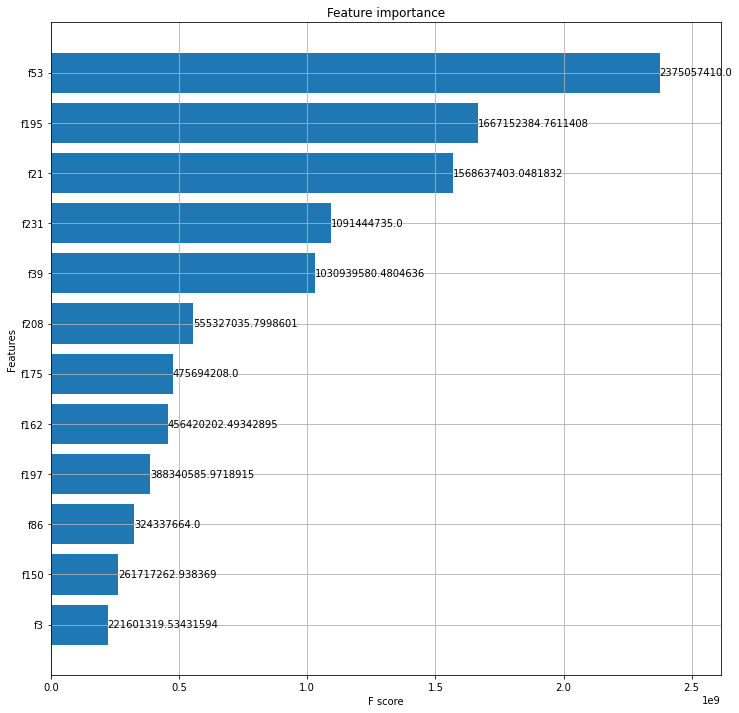

In [34]:
git, ax = plt.subplots(figsize=(12, 12))
xgb.plot_importance(model, importance_type = "gain", max_num_features=12, height=0.8, ax=ax)
plt.show()

##提出

In [46]:
test_prediction = model.predict(xgb.DMatrix(test[test.columns[1:]].values))
#小数を丸めて整数←これをしないとkaggleに提出しても正しく採点されない
# prediction_XG = np.round(test_prediction).astype(int)

test_prediction
# test_prediction_list=prediction_XG.tolist()
# test_prediction_1d = sum(test_prediction_list, [])
# test_prediction_1d

array([126727.12, 162971.55, 188931.66, ..., 167984.42, 110287.09,
       231242.52], dtype=float32)

In [47]:
# kaggleの課題として PassengerId 1461 ~ 2919 を予測することが要求されているため
# idを生成しておく
id = np.arange(1461,2920)

# Idと予測結果をデータフレーム化
test_result = pd.DataFrame( { 'Id': id , 'SalePrice': test_prediction} )
print(test_result.head(10))

     Id      SalePrice
0  1461  126727.117188
1  1462  162971.546875
2  1463  188931.656250
3  1464  193289.734375
4  1465  205600.000000
5  1466  182118.625000
6  1467  176514.687500
7  1468  164815.125000
8  1469  183980.625000
9  1470  121000.664062


In [48]:
# 生成したデータフレームをcsvとして保存
test_result.to_csv( '/content/drive/MyDrive/Colab Notebooks/Kaggle/house-prices-advanced-regression-techniques/XGBoost_housePrice_forsubmisson.csv' , index = False )

In [ ]:
# def objective(params):

#     skf = cross_validation.StratifiedKFold(
#         train_y, # Samples to split in K folds
#         n_folds=5, # Number of folds. Must be at least 2.
#         shuffle=True, # Whether to shuffle each stratification of the data before splitting into batches.
#         random_state=30 # pseudo-random number generator state used for shuffling
#     )

#     boost_rounds = []
#     score = []

#     for train, test in skf:
#         _train_x, _test_x, _train_y, _test_y = \
#             train_x[train], train_x[test], train_y[train], train_y[test]

#         train_xd = xgb.DMatrix(_train_x, label=_train_y)
#         test_xd = xgb.DMatrix(_test_x, label=_test_y)
#         watchlist = [(train_xd, 'train'),(test_xd, 'eval')]

#         model = xgb.train(
#             params,
#             train_xd,
#             num_boost_round=100,
#             evals=watchlist,
#             early_stopping_rounds=30
#         )

#         boost_rounds.append(model.best_iteration)
#         score.append(model.best_score)

#     print('average of best iteration:', np.average(boost_rounds))
#     return {'loss': np.average(score), 'status': STATUS_OK}

# def optimize(trials):
#     space = {'booster':'dart',
#          'learning_rate':0.1,
#          'n_estimators':1000,
#          'sample_type':'uniform',
#          'normalize_type': 'tree',
#          'objective':'binary:logistic',
#          'min_child_weight':1,
#          'max_depth':9,
#          'gamma':0.0,
#          'subsample':0.6,
#          'colsample_bytree':0.9,
#          'reg_alpha':1e-05,
#          'nthread':4,
#          'scale_pos_weight':1,
#          'seed':27,}
    
#     # minimize the objective over the space
#     best_params = fmin(
#         fn=objective,
#         space=space,
#         algo=tpe.suggest,
#         trials=trials,
#         max_evals=10
#     )

#     return best_params

# # parameter tuning
# trials = Trials()
# best_params = optimize(trials)
# print(best_params)

# # 損失関数(loss)の計算
# print(objective(best_params))

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.metrics import mean_squared_error
# from xgboost import XGBRegressor

# # 5分割済みの訓練＆検証データとテストデータのロード
# df_train = train[train.columns[1:]].values
# df_test = train[train.columns[1:]].values

# # 利用する特徴量の選択
# useful_features = [c for c in df_train.columns if c not in ('id', 'target', 'kfold')]

# # カテゴリ変数の選択
# categorical_cols = [c for c in useful_features if df_train[c].dtype == 'object']

# valid_scores = [] # 検証データの評価スコアを保存する変数
# test_predictions = [] # テストデータに対する予測結果を保存する変数

# # 5分割（fold）したデータセットで交差検証
# for fold in range(5):

#   # フォールドインデックスに一致するものを検証データとして使う
#   X_valid = df_train[df_train.kfold == fold].reset_index(drop=True)

#   # フォールドインデックスに一致しないものを訓練データとして使う
#   X_train =  df_train[df_train.kfold != fold].reset_index(drop=True)

#   # テストデータのコピー
#   X_test = df_test[useful_features]

#   # 正解値の教師データ
#   y_train = X_train.target
#   y_valid = X_valid.target

#   # 特徴量の選択
#   X_train = X_train[useful_features]
#   X_valid = X_valid[useful_features]
#   X_test = X_test[useful_features]

#   # カテゴリー変数の序数エンコーディング
#   ordinal_encoder = OrdinalEncoder()
#   X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])
#   X_valid[categorical_cols] = ordinal_encoder.transform(X_valid[categorical_cols])
#   X_test[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])

#   # XGBoostのモデルを訓練（fit）する
#   model = XGBRegressor(
#     #n_jobs=-1, # CPUを使う場合
#     tree_method='gpu_hist', gpu_id=-1, predictor='gpu_predictor', # GPUを使う場合
#     random_state=fold) 
#   model.fit(X_train, y_train)

#   # 検証データをモデルに入力して予測する
#   preds_valid = model.predict(X_valid)
#   # 検証データの評価スコアを取得し、ループ外の変数に保存して、スコアを出力
#   score_valid = mean_squared_error(y_valid, preds_valid, squared=False)
#   valid_scores.append(score_valid)
#   print(fold, score_valid)

#   # 同様に、テストデータをモデルに入力して予測する
#   preds_test = model.predict(X_test)
#   # 予測結果をループ外の変数に保存
#   test_predictions.append(preds_test)

# # 出力例：
# # 0 0.7245705518241878
# # 1 0.7242510349403168
# # 2 0.7263048437982703
# # 3 0.7268360366892102
# # 4 0.7257268137232141

# # 5回分の検証データによる評価スコアを平均する
# score_validation = np.mean(valid_scores)
# print(score_validation)
# # 出力例： 0.7255378561950397

# # 5回分のテストデータに対する予測結果を平均する
# preds_submission = np.mean(np.column_stack(test_predictions), axis=1)
# print(preds_submission)
# # 出力例： [8.015874 8.346141 8.373257 ... 8.317327 8.129509 8.017377]



#重回帰分析

In [39]:
# ホールド・アウト法でデータを分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_co_train[df_co_train.columns[1:]], df_co_train[df_co_train.columns[0]], test_size = 0.3, random_state = 0)
# 線形回帰モデルを使う
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# trainデータを使って学習する
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# 自由度調整済み決定係数関数を定義する
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
  


# モデルの評価
print('adjusted R^2')
print('train: %.3f' % adjusted(lr.score(X_train, y_train), len(y_train),X_train.shape[1]))
print('test : %.3f' % adjusted(lr.score(X_test, y_test), len(y_test), X_test.shape[1]))

adjusted R^2
train: 0.824
test : 0.716


In [41]:
# 予測する
y_pred = lr.predict(df_co_test)

In [42]:
# kaggleの課題として PassengerId 1461 ~ 2919 を予測することが要求されているため
# idを生成しておく
id = np.arange(1461,2920)

# Idと予測結果をデータフレーム化
test_result = pd.DataFrame( { 'Id': id , 'SalePrice': y_pred } )
print(test_result.head(10))

     Id      SalePrice
0  1461  117140.112335
1  1462  156505.628554
2  1463  183073.435973
3  1464  200842.937012
4  1465  195289.336753
5  1466  176289.657423
6  1467  156116.488793
7  1468  166574.886450
8  1469  211480.230112
9  1470   99451.683234


In [43]:
# 生成したデータフレームをcsvとして保存
test_result.to_csv( '/content/drive/MyDrive/Colab Notebooks/Kaggle/house-prices-advanced-regression-techniques/LinearRegression_housePrice_forsubmisson.csv' , index = False )

#アンサンブル学習

In [223]:
#https://potesara-tips.com/ensemble-stacking/
#https://zenn.dev/megane_otoko/articles/060_stacking

In [224]:
!pip install lightgbm
!pip install catboost

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoost
from catboost import Pool

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn import datasets

In [226]:
#２段のスタッキングによる予測を行います。

# １段目は、２段目に使用する特徴量を作成します。
# ２段目は、１段目で作成した特徴量を使用して、目的変数の予測を行います。



##XGBoost

In [227]:
def xgb_train_cv(X_train_cv, y_train_cv, X_eval_cv, y_eval_cv, loop_counts):
    # データを格納する
    # 学習用
    xgb_train = xgb.DMatrix(X_train_cv, label=y_train_cv)
    # 検証用
    xgb_eval = xgb.DMatrix(X_eval_cv, label=y_eval_cv)
    # テスト用
    #xgb_test = xgb.DMatrix(X_test, label=y_test)

    # xgb_params = {
    #     'objective': ''loss_function': 'RMSE',  # 多値分類問題
    #     'num_class': 3,                 # 目的変数のクラス数
    #     'learning_rate': 0.1,           # 学習率
    #     'eval_metric': 'mlogloss'       # 学習用の指標 (Multiclass logloss)
    # }
    xgb_params = {
        "silent": 0,
        "max_depth": 50,
        "min_child_weight": 1,
        "eta": 0.2,
        "tree_method": "exact",
        "objective": 'reg:squarederror',
        "eval_metric": "rmse",
        # "predictor": "cpu_predictor" 
        'random_state':1234,
        }

    # 学習
    evals = [(xgb_train, 'train'), (xgb_eval, 'eval')] # 学習に用いる検証用データ
    evaluation_results = {}                            # 学習の経過を保存する箱
    bst = xgb.train(xgb_params,                        # 上記で設定したパラメータ
                    xgb_train,                         # 使用するデータセット
                    num_boost_round=1000,               # 学習の回数
                    early_stopping_rounds=5,          # アーリーストッピング
                    evals=evals,                       # 学習経過で表示する名称
                    evals_result=evaluation_results,   # 上記で設定した検証用データ
                    verbose_eval=0                     # 学習の経過の表示(非表示)
                    )
    
    # 検証用データで予測
    y_pred = bst.predict(xgb_eval, ntree_limit=bst.best_ntree_limit)
    # y_pred_max = np.argmax(y_pred, axis=1)

    print('Trial: ' + str(loop_counts))
    
    # # Accuracy の計算
    # accuracy = accuracy_score(y_eval_cv, y_pred_max)
    # print('XGBoost Accuracy:', accuracy)

    # plt.plot(evaluation_results["train"]["rmse"], color = "red", label = "train")
    # plt.plot(evaluation_results["eval"]["rmse"], color = "blue", label = "eval")
    # plt.legend()
    # plt.show()

    rmse_result=np.sqrt(mean_squared_error(y_eval_cv, y_pred))
    print('XGBoost RMSE:', rmse_result)
    
    return(bst, rmse_result,y_pred)

##LightGBM

In [228]:
def lgbm_train_cv(X_train_cv, y_train_cv, X_eval_cv, y_eval_cv):
    # データを格納する
    # 学習用
    lgb_train = lgb.Dataset(X_train_cv, y_train_cv,
                            free_raw_data=False)
    # 検証用
    lgb_eval = lgb.Dataset(X_eval_cv, y_eval_cv, reference=lgb_train,
                           free_raw_data=False)
    
    # パラメータを設定
    params = {'task': 'train',                # レーニング ⇔　予測predict
              'boosting_type': 'gbdt',        # 勾配ブースティング
              # 'objective': 'multiclass',      # 目的関数：多値分類、マルチクラス分類
              'objective': 'regression',
              'metric': 'rmse',      # 検証用データセットで、分類モデルの性能を測る指標
              # 'num_class': 3,                 # 目的変数のクラス数
              'learning_rate': 0.1,           # 学習率（初期値0.1）
              'num_leaves': 40,               # 決定木の複雑度を調整（初期値31）
              'min_data_in_leaf': 1,          # データの最小数（初期値20）
             }

    # 学習
    evaluation_results = {}                                # 学習の経過を保存する箱
    LGBM_model = lgb.train(params,                              # 上記で設定したパラメータ
                      lgb_train,                           # 使用するデータセット
                      num_boost_round=1000,                 # 学習の回数
                      valid_names=['train', 'valid'],      # 学習経過で表示する名称
                      valid_sets=[lgb_train, lgb_eval],    # モデルの検証に使用するデータセット
                      evals_result=evaluation_results,     # 学習の経過を保存
                      early_stopping_rounds=5,            # アーリーストッピングの回数
                      verbose_eval=0)                      # 学習の経過を表示する刻み（非表示）

    # 検証用データで予測
    y_pred = LGBM_model.predict(X_eval_cv, num_iteration=LGBM_model.best_iteration)
    y_pred_max = np.argmax(y_pred)

    # # Accuracy の計算
    # accuracy = accuracy_score(y_eval_cv, y_pred_max)
    # print('LightGBM Accuracy:', accuracy)
    
    rmse_result=np.sqrt(mean_squared_error(y_eval_cv, y_pred))
    print('LightGBM RMSE:', rmse_result)
    
    return(LGBM_model, rmse_result,y_pred)

##CatBoost

In [229]:
def catboost_train_cv(X_train_cv, y_train_cv, X_eval_cv, y_eval_cv):
    # データを格納する
    # 学習用
    CatBoost_train = Pool(X_train_cv, label=y_train_cv)
    # 検証用
    CatBoost_eval = Pool(X_eval_cv, label=y_eval_cv)

    # パラメータを設定
    params = {        
        'loss_function': 'RMSE',    # 多値分類問題
        'num_boost_round': 1000,          # 学習の回数
        'early_stopping_rounds': 5       # アーリーストッピングの回数
    }

    # 学習
    catb = CatBoost(params)
    catb.fit(CatBoost_train, eval_set=[CatBoost_eval], verbose=False)

    # 検証用データで予測
    y_pred = catb.predict(X_eval_cv)
    # y_pred_max = np.argmax(y_pred, axis=1)

    # # Accuracy の計算
    # accuracy = sum(y_eval_cv == y_pred_max) / len(y_eval_cv)
    # print('CatBoost Accuracy:', accuracy)

    rmse_result=np.sqrt(mean_squared_error(y_eval_cv, y_pred))
    print('CatBoost RMSE:', rmse_result)
    
    return(catb, rmse_result,y_pred)

##1段目

In [230]:
# 各5つのモデルを保存するリストの初期化
xgb_models = []
lgbm_models = []
catb_models = []
# 各5つのモデルの正答率を保存するリストの初期化
xgb_rmse_result = []
lgbm_rmse_result = []
catb_rmse_result = []
# 学習のカウンター
loop_counts = 1

# X=train[train.columns[1:]].values
# Y=train[train.columns[0]].values
df_X=train[train.columns[1:]]
y= np.log(train[train.columns[0]])

# # 各クラスの確率（3モデル*5seed*３クラス）
first_preds = pd.DataFrame(np.zeros((len(df_X), 3*5)))


for seed_no in range(5): 
        
    # 学習データの数だけの数列（0行から最終行まで連番）
    row_no_list = list(range(len(df_X)))

    # KFoldクラスをインスタンス化（これを使って5分割する）Stratified Kfoldは、分類問題にしか使えません
    K_fold = StratifiedKFold(n_splits=5, shuffle=True,  random_state=42)
    #＃回帰問題でも＃回帰問題でもStratifiedKFoldが使えるように以下追記
    num_bins = int(np.floor(1+np.log2(len(y))))
    y_bin = pd.cut(y, bins=num_bins, labels=False)
    

    # KFoldクラスで分割した回数だけ実行（ここでは5回）
    for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y_bin):
    # for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y):
        # ilocで取り出す行を指定
        X_train_cv = df_X.iloc[train_cv_no, :]
        y_train_cv = pd.Series(y).iloc[train_cv_no]
        X_eval_cv = df_X.iloc[eval_cv_no, :]
        y_eval_cv = pd.Series(y).iloc[eval_cv_no]
        
        # XGBoostの訓練を実行
        bst, bst_rmse, bst_pred = xgb_train_cv(X_train_cv, y_train_cv, X_eval_cv, y_eval_cv, loop_counts)
        # LIghtGBMの訓練を実行
        LGBM_model, model_rmse, model_pred = lgbm_train_cv(X_train_cv, y_train_cv,X_eval_cv, y_eval_cv)
        # CatBoostの訓練を実行
        catb, catb_rmse, catb_pred = catboost_train_cv(X_train_cv, y_train_cv,X_eval_cv, y_eval_cv)
        # 実行回数のカウント
        loop_counts += 1
        
        # 学習が終わったモデルをリストに入れておく
        xgb_models.append(bst) 
        lgbm_models.append(LGBM_model) 
        catb_models.append(catb) 
        
        # 学習が終わったモデルの正答率をリストに入れておく
        xgb_rmse_result.append(bst_rmse) 
        lgbm_rmse_result.append(model_rmse) 
        catb_rmse_result.append(catb_rmse) 
        
        # # 検証データの各クラスの確率
        # for i in range(3):
        #     first_probs.iloc[eval_cv_no, (seed_no * 3) + i] = xgb_prob[:, i]
        #     first_probs.iloc[eval_cv_no, (seed_no * 3) + 15 + i] = lgbm_prob[:, i]
        #     first_probs.iloc[eval_cv_no, (seed_no * 3) + 30 + i] = catb_prob[:, i]

        # # 検証データの結果
        first_preds.iloc[eval_cv_no, (seed_no * 3) ] =bst_pred
        first_preds.iloc[eval_cv_no, (seed_no * 3) + 1] = model_pred
        first_preds.iloc[eval_cv_no, (seed_no * 3) + 2] = catb_pred

Trial: 1
XGBoost RMSE: 0.16333064794693022
LightGBM RMSE: 0.166137105905993
CatBoost RMSE: 0.15206054331582625
Trial: 2
XGBoost RMSE: 0.15493387280327559
LightGBM RMSE: 0.15359386648433948
CatBoost RMSE: 0.1412465381497658
Trial: 3
XGBoost RMSE: 0.152003541716029
LightGBM RMSE: 0.14529617214406965
CatBoost RMSE: 0.12845763734794277
Trial: 4
XGBoost RMSE: 0.14323098508280818
LightGBM RMSE: 0.14673653428385994
CatBoost RMSE: 0.13588917292577266
Trial: 5
XGBoost RMSE: 0.18414443938619862
LightGBM RMSE: 0.18061412856360434
CatBoost RMSE: 0.16734829101540072
Trial: 6
XGBoost RMSE: 0.16333064794693022
LightGBM RMSE: 0.166137105905993
CatBoost RMSE: 0.15206054331582625
Trial: 7
XGBoost RMSE: 0.15493387280327559
LightGBM RMSE: 0.15359386648433948
CatBoost RMSE: 0.1412465381497658
Trial: 8
XGBoost RMSE: 0.152003541716029
LightGBM RMSE: 0.14529617214406965
CatBoost RMSE: 0.12845763734794277
Trial: 9
XGBoost RMSE: 0.14323098508280818
LightGBM RMSE: 0.14673653428385994
CatBoost RMSE: 0.13588917292

In [231]:
first_preds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,12.238173,12.207669,12.259231,12.238173,12.207669,12.259231,12.238173,12.207669,12.259231,12.238173,12.207669,12.259231,12.238173,12.207669,12.259231
1,12.039981,11.979465,12.037025,12.039981,11.979465,12.037025,12.039981,11.979465,12.037025,12.039981,11.979465,12.037025,12.039981,11.979465,12.037025
2,12.269125,12.255262,12.284172,12.269125,12.255262,12.284172,12.269125,12.255262,12.284172,12.269125,12.255262,12.284172,12.269125,12.255262,12.284172
3,12.061073,12.151653,12.083688,12.061073,12.151653,12.083688,12.061073,12.151653,12.083688,12.061073,12.151653,12.083688,12.061073,12.151653,12.083688
4,12.580350,12.630113,12.672328,12.580350,12.630113,12.672328,12.580350,12.630113,12.672328,12.580350,12.630113,12.672328,12.580350,12.630113,12.672328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.050981,12.080365,12.057150,12.050981,12.080365,12.057150,12.050981,12.080365,12.057150,12.050981,12.080365,12.057150,12.050981,12.080365,12.057150
1456,12.067950,12.097095,12.191398,12.067950,12.097095,12.191398,12.067950,12.097095,12.191398,12.067950,12.097095,12.191398,12.067950,12.097095,12.191398
1457,12.481634,12.495797,12.420394,12.481634,12.495797,12.420394,12.481634,12.495797,12.420394,12.481634,12.495797,12.420394,12.481634,12.495797,12.420394
1458,11.768242,11.792259,11.804358,11.768242,11.792259,11.804358,11.768242,11.792259,11.804358,11.768242,11.792259,11.804358,11.768242,11.792259,11.804358


In [232]:
# 単独のモデルでの、テストデータの正答率
#スタッキングによる予測の１段目は、特徴量の抽出が目的なので、ここでの正答率はあまり気にしないでよいです。
print('XGBoost RMSE: ', np.array(xgb_rmse_result).mean())
print('LightGBM RMSE: ', np.array(lgbm_rmse_result).mean())
print('CatBoost RMSE: ', np.array(catb_rmse_result).mean())

XGBoost RMSE:  0.1595286973870483
LightGBM RMSE:  0.15847556147637332
CatBoost RMSE:  0.14500043655094164


##スタッキングによる予測です。

２段目は、１段目で作成した特徴量を使用して、単独のXGBoostのモデルを作成します。

In [233]:
loop_counts = 0

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(first_preds, y.values,
                                                    test_size=0.2,
                                                    random_state=0)

# 予測結果の格納用のnumpy行列を作成
test_preds = np.zeros((len(y_test), 5))

# 学習データの数だけの数列（0行から最終行まで連番）
row_no_list = list(range(len(y_train)))

# KFoldクラスをインスタンス化（これを使って5分割する）
K_fold = StratifiedKFold(n_splits=5, shuffle=True,  random_state=0)
#＃回帰問題でも＃回帰問題でもStratifiedKFoldが使えるように以下追記
num_bins2 = int(np.floor(1+np.log2(len(y_train))))
y_train_bin = pd.cut(y_train, bins=num_bins2, labels=False)

# KFoldクラスで分割した回数だけ実行（ここでは5回）
for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y_train_bin):
# for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y_train):
    # ilocで取り出す行を指定
    X_train_cv = X_train.iloc[train_cv_no, :]
    y_train_cv = pd.Series(y_train).iloc[train_cv_no]
    X_eval_cv = X_train.iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y_train).iloc[eval_cv_no]

    # データを格納する
    # 学習用
    xgb_train = xgb.DMatrix(X_train_cv, label=y_train_cv)
    # 検証用
    xgb_eval = xgb.DMatrix(X_eval_cv, label=y_eval_cv)
    # テスト用
    xgb_test = xgb.DMatrix(X_test, label=y_test)

    # xgb_params = {
    #     'objective': 'multi:softprob',  # 多値分類問題
    #     'num_class': 3,                 # 目的変数のクラス数
    #     'learning_rate': 0.1,           # 学習率
    #     'eval_metric': 'mlogloss'       # 学習用の指標 (Multiclass logloss)
    # }
    xgb_params2 = {
        "silent": 0,
        "max_depth": 10,
        "min_child_weight": 1,
        "eta": 0.1,
        "tree_method": "exact",
        "objective": 'reg:squarederror',
        "eval_metric": "rmse",
        # "predictor": "cpu_predictor" 
        'random_state':1234,
        }

    # 学習
    evals = [(xgb_train, 'train'), (xgb_eval, 'eval')] # 学習に用いる検証用データ
    evaluation_results = {}                            # 学習の経過を保存する箱
    bst2 = xgb.train(xgb_params2,                        # 上記で設定したパラメータ
                    xgb_train,                         # 使用するデータセット
                    num_boost_round=1000,               # 学習の回数
                    early_stopping_rounds=5,          # アーリーストッピング
                    evals=evals,                       # 学習経過で表示する名称
                    evals_result=evaluation_results,   # 上記で設定した検証用データ
                    verbose_eval=0                     # 学習の経過の表示(非表示)
                    )


    y_pred = bst2.predict(xgb_test, ntree_limit=bst2.best_ntree_limit)
    # y_pred_max = np.argmax(y_pred, axis=1)
    
    # testの予測を保存
    test_preds[:, loop_counts] = y_pred
 
    print('Trial: ' + str(loop_counts))
    loop_counts += 1
    rmse__ = np.sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE:', rmse__)

Trial: 0
RMSE: 0.17612957241961194
Trial: 1
RMSE: 0.16745164927421574
Trial: 2
RMSE: 0.17991996913942668
Trial: 3
RMSE: 0.17982411305948323
Trial: 4
RMSE: 0.17783704220209715


In [234]:
!pip install optuna

In [235]:
import optuna

#学習データを説明変数と目的変数に分ける
# X=df_co_train[df_co_train.columns[1:]].values
# Y=df_co_train[df_co_train.columns[0]].values
X=train[train.columns[1:]].values
Y=train[train.columns[0]].values

# データを訓練データと正解データに7:3で分ける
X_train, X_test, y_train, y_test = train_test_split(first_preds, y.values,
                                                    test_size=0.2,
                                                    random_state=0)

#データをXGB専用のデータ型に変換
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

def objective(trial):
  # 探索したいパラメータの範囲を記述 例えば、trial.suggest_int(“max_depth”, 6, 9)ならmax_depthを6,7,8,9の中で動かしながら探索
  params = {
        "silent": 0,
        "max_depth": trial.suggest_int("max_depth", 6, 10),
        "min_child_weight": 1,
        "eta": trial.suggest_loguniform("eta", 0.01, 0.3),
        "tree_method": "exact",
        "objective": 'reg:squarederror',
        "eval_metric": "rmse",
        # "predictor": "cpu_predictor" 
        'random_state':1234,  
    }
    # モデル定義、学習
  cv_results = xgb.cv(
      params,
      dtrain,
      num_boost_round=1000,
      seed=1234,
      nfold=5, # CVの分割数
      metrics={"rmse"},
      early_stopping_rounds=10
      )
    # 評価

  return cv_results["test-rmse-mean"].min()

study=optuna.create_study()
study.optimize(objective,n_trials=100)

[I 2022-01-09 22:10:20,011] A new study created in memory with name: no-name-ebd5525d-6fa0-4b70-9714-8b58086b9948
[I 2022-01-09 22:10:28,822] Trial 0 finished with value: 0.1559364 and parameters: {'max_depth': 10, 'eta': 0.013227035864532489}. Best is trial 0 with value: 0.1559364.
[I 2022-01-09 22:10:30,574] Trial 1 finished with value: 0.1568328 and parameters: {'max_depth': 10, 'eta': 0.07646585804407904}. Best is trial 0 with value: 0.1559364.
[I 2022-01-09 22:10:35,245] Trial 2 finished with value: 0.1556602 and parameters: {'max_depth': 9, 'eta': 0.02425906831570051}. Best is trial 2 with value: 0.1556602.
[I 2022-01-09 22:10:44,159] Trial 3 finished with value: 0.1566032 and parameters: {'max_depth': 10, 'eta': 0.013433745870562704}. Best is trial 2 with value: 0.1556602.
[I 2022-01-09 22:10:51,027] Trial 4 finished with value: 0.15566719999999998 and parameters: {'max_depth': 9, 'eta': 0.016646855125223594}. Best is trial 2 with value: 0.1556602.
[I 2022-01-09 22:10:52,241] Tr

In [236]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value: 0.15292719999999999
  Params: 
    max_depth: 6
    eta: 0.056708641695428455


[0]	train-rmse:10.8779	eval-rmse:10.8809
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:10.2624	eval-rmse:10.2654
[2]	train-rmse:9.68184	eval-rmse:9.6848
[3]	train-rmse:9.13417	eval-rmse:9.13674
[4]	train-rmse:8.61753	eval-rmse:8.61941
[5]	train-rmse:8.13015	eval-rmse:8.13175
[6]	train-rmse:7.67038	eval-rmse:7.67136
[7]	train-rmse:7.23666	eval-rmse:7.23785
[8]	train-rmse:6.82751	eval-rmse:6.82839
[9]	train-rmse:6.44153	eval-rmse:6.4423
[10]	train-rmse:6.07742	eval-rmse:6.07907
[11]	train-rmse:5.73395	eval-rmse:5.73534
[12]	train-rmse:5.40993	eval-rmse:5.41166
[13]	train-rmse:5.10429	eval-rmse:5.10595
[14]	train-rmse:4.81595	eval-rmse:4.81765
[15]	train-rmse:4.54395	eval-rmse:4.54598
[16]	train-rmse:4.28737	eval-rmse:4.28962
[17]	train-rmse:4.0453	eval-rmse:4.04818
[18]	train-rmse:3.81695	eval-rmse:3.82034
[19]	train-rmse:3.60156	eval-rmse:3.60454
[20]	train-rmse:3.39836	eval-r

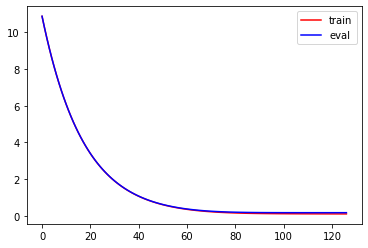

In [237]:
#訓練データはdtrain、評価用のテストデータはdvalidと設定
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
params = {
      "silent": 0,
      "max_depth": 50,
      "min_child_weight": 1,
      "eta": 0.2,
      "tree_method": "exact",
      "objective": 'reg:squarederror',
      "eval_metric": "rmse",
      # "predictor": "cpu_predictor" 
      'random_state':1234,  
  }
params["max_depth"] = trial.params["max_depth"]
params["eta"] = trial.params["eta"]
results_dict = {}
XGBmodel2 = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=10000,
                  early_stopping_rounds=10,
                  evals=watchlist,
                  evals_result = results_dict,
                  )
plt.plot(results_dict["train"]["rmse"], color = "red", label = "train")
plt.plot(results_dict["eval"]["rmse"], color = "blue", label = "eval")
plt.legend()
plt.show()


##提出

In [238]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
618,12.455796,12.576867,12.595145,12.455796,12.576867,12.595145,12.455796,12.576867,12.595145,12.455796,12.576867,12.595145,12.455796,12.576867,12.595145
870,11.640957,11.670384,11.567041,11.640957,11.670384,11.567041,11.640957,11.670384,11.567041,11.640957,11.670384,11.567041,11.640957,11.670384,11.567041
92,11.739506,11.776815,11.763217,11.739506,11.776815,11.763217,11.739506,11.776815,11.763217,11.739506,11.776815,11.763217,11.739506,11.776815,11.763217
817,12.598810,12.525685,12.631864,12.598810,12.525685,12.631864,12.598810,12.525685,12.631864,12.598810,12.525685,12.631864,12.598810,12.525685,12.631864
302,12.338032,12.304760,12.359298,12.338032,12.304760,12.359298,12.338032,12.304760,12.359298,12.338032,12.304760,12.359298,12.338032,12.304760,12.359298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,12.801763,12.669475,12.704291,12.801763,12.669475,12.704291,12.801763,12.669475,12.704291,12.801763,12.669475,12.704291,12.801763,12.669475,12.704291
835,11.676009,11.761532,11.787859,11.676009,11.761532,11.787859,11.676009,11.761532,11.787859,11.676009,11.761532,11.787859,11.676009,11.761532,11.787859
1216,11.930569,11.944007,11.896706,11.930569,11.944007,11.896706,11.930569,11.944007,11.896706,11.930569,11.944007,11.896706,11.930569,11.944007,11.896706
559,12.237530,12.227582,12.260910,12.237530,12.227582,12.260910,12.237530,12.227582,12.260910,12.237530,12.227582,12.260910,12.237530,12.227582,12.260910


In [239]:
test_x_xgbst1=xgb.DMatrix(test[test.columns[1:]])
lgb_test = lgb.Dataset(test[test.columns[1:]], free_raw_data=False)
CatBoost_test = Pool(test[test.columns[1:]])

test_first_preds = pd.DataFrame(np.zeros((len(test[test.columns[1:]]), 3*5)))#モデル数＊＊seed数

for seed in range(5):
  xgbst1 = bst.predict(test_x_xgbst1, ntree_limit=bst.best_ntree_limit)
  LGBM1=LGBM_model.predict(test[test.columns[1:]], num_iteration=LGBM_model.best_iteration)
  catb1 = catb.predict(CatBoost_test)
  # # 検証データの結果
  test_first_preds.iloc[:, (seed * 3) ] =xgbst1
  test_first_preds.iloc[:, (seed * 3) + 1] = LGBM1
  test_first_preds.iloc[:, (seed * 3) + 2] = catb1



In [240]:
#2段

# bst2_predict=bst2.predict(xgb.DMatrix(test_first_preds), ntree_limit=bst2.best_ntree_limit)
bst2_predict = XGBmodel2.predict(xgb.DMatrix(test_first_preds), ntree_limit=XGBmodel2.best_ntree_limit)
bst2_predict

# kaggleの課題として PassengerId 1461 ~ 2919 を予測することが要求されているため
# idを生成しておく
id = np.arange(1461,2920)

# Idと予測結果をデータフレーム化
test_result = pd.DataFrame( { 'Id': id , 'SalePrice': np.exp(bst2_predict)} )
print(test_result.head(10))

     Id      SalePrice
0  1461  120414.382812
1  1462  141615.421875
2  1463  186059.250000
3  1464  187901.265625
4  1465  194005.906250
5  1466  168822.468750
6  1467  168391.546875
7  1468  168085.406250
8  1469  189298.812500
9  1470  128453.820312


In [241]:
# 生成したデータフレームをcsvとして保存
test_result.to_csv( '/content/drive/MyDrive/Colab Notebooks/Kaggle/house-prices-advanced-regression-techniques/0110-2_housePrice_forsubmisson.csv' , index = False )